# Times Series Project
# Milestone 2
## (The data solution from milestone 1 is included because of the previous activities, specially the Data Preparation). 

### Jaceguai de Magalhaes, Jan 13 2022

## Context
 
Earth is an extensive environmental system that makes life possible for us. According to Bryson (2003), several conditions needed to be present to make life as we know possible on this planet. One of those conditions is temperature.

It is a fact that Earth’s temperature has changed throughout history, cooling and warming again. There are several causes behind that change, and according to Riebeek (2010), those causes could be subtle shifts in the orbit, Sun’s energy variation, and humanity in the past century.

Humanity came to the scene regarding Global Temperature because of the greenhouse gases, more specific Carbon-Dioxide (CO2). One significant source of CO2 is burning fossil fuels to generate energy.

The problem with greenhouse gases is that they change Earth’s atmosphere to increase Earth’s surface temperature. The global mean surface temperature had risen roughly 0.5 degrees Celsius above the long-term (1951-1980) average (Fig. 1), according to Riebeek (2010).

“The impact of global warming is far greater than just increasing temperatures. Warming modifies rainfall patterns, amplifies coastal erosion, lengthens the growing season in some regions, melts ice caps and glaciers, and alters the ranges of some infectious diseases. Some of these changes are already occurring”, Riebeek (2010).

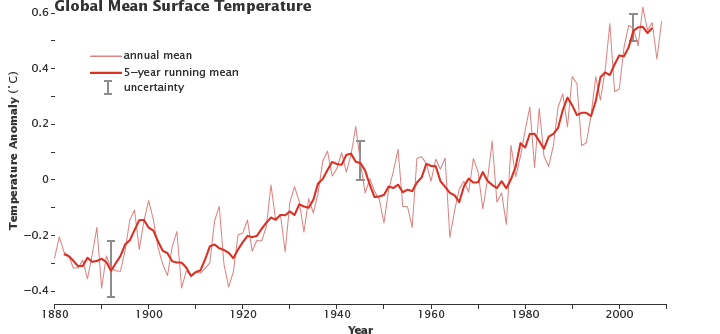
Fig. 1 – Variation of Global Mean Surface Temperature.
Source - https://earthobservatory.nasa.gov/features/GlobalWarming

Humanity has been making several efforts to use clean alternative energy sources, but those are either not available on a large scale or have some other environmental constraint attached. The reality is that humans still need to burn fossil fuel to generate energy, therefore will emit CO2.

An alternative to minimize the effect of greenhouse gases emission is to use a source that emits less  CO2 than the other. According to the U.S. Energy Information Administration, EIA (2021), Natural Gas has a CO2 emission coefficient of 52.91 Kg of CO2 per million BTU against  95.74 Kg of CO2 per million BTU from Coal (All types) and 102,12 Kg of CO2 per million BTU from Petroleum coke. Therefore, it is wise to replace Coal and Petroleum-based energy generation with Natural Gas until a clean alternative is available.

It is essential to understand Natural Gas emissions to forecast CO2 emissions.

# Milestone 1

## Objective

This project aims to Forecast Natural Gas (NNEIEUS) carbon emissions in the electric power sector for the next 12 months and propose measures that can be adopted as policies to reduce these emissions.

## Key questions

* How have CO2 emissions developed in the electric power sector throughout time?
* What is the relation between Natural Gas emission and other sources?
* How have Natural Gas CO2 emissions developed?
* What is the forecast for Natural Gas CO2 emissions for the next 12 months?
* What are alternatives to reduce Natural Gas’ CO2 emissions?



## Problem Formulation

Understand Natural Gas CO2 emissions in the electric power sector throughout the time, build a model using Time Series techniques to forecast these emissions for the next 12 months, and propose specific measures that can be adopted as policies to reduce those carbon emissions.

## Data Exploration

## Attributes Information

This data is the past monthly data of Carbon dioxide emissions from electricity generation from the US Energy Information Administration categorized by fuel type such as Coal, Natural gas etc.

The dataset have data from the period from January 1973 to July 2016.

**MSN:-** Reference to Mnemonic Series Names (U.S. Energy Information Administration Nomenclature)

**YYYYMM:-** The month of the year on which these emissions were observed

**Value:-** Amount of CO2 Emissions in Million Metric Tons of Carbon Dioxide

**Description:-**  Different category of electricity production through which carbon is emissioned.

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Loading the libraries**

In [1]:
# It is recommended to upgrade the statsmodels library. 
# Uncomment the below code to upgrade statsmodels
#!pip install statsmodels --upgrade

In [2]:
#Installing pmdarima
#!pip install pmdarima

In [3]:
#Import basic libraries
import pandas as pd
import numpy as np

#statistics packages
import statsmodels.api as sm
# importing ADF test from statsmodels package
from statsmodels.tsa.stattools import adfuller
# module to create ACF and PACF plots
from statsmodels.graphics import tsaplots

#module for auto-arima model
#import pmdarima as pm
from pmdarima.arima import auto_arima

# module to build AR, MA, ARMA and ARIMA models
from statsmodels.tsa.arima.model import ARIMA

# module to build sarima models
from statsmodels.tsa.statespace.sarimax import SARIMAX

# module to implement MSE and RSME during model evaluation
from sklearn.metrics import mean_squared_error

#visualization packages
import matplotlib.pyplot as plt
import seaborn as sns




#to ignore warnings
import warnings
import itertools
warnings.filterwarnings("ignore")

### **Loading the data**

In [4]:
df = pd.read_excel('MER_T12_06.xlsx')
df.head()

MSN  YYYYMM   Value                               Description
0  CLEIEUS  197301  72.076  Coal Electric Power Sector CO2 Emissions
1  CLEIEUS  197302  64.442  Coal Electric Power Sector CO2 Emissions
2  CLEIEUS  197303  64.084  Coal Electric Power Sector CO2 Emissions
3  CLEIEUS  197304  60.842  Coal Electric Power Sector CO2 Emissions
4  CLEIEUS  197305  61.798  Coal Electric Power Sector CO2 Emissions

In [5]:
# Conversion of "YYYYMM" columnn into standard datetime format
# We are using errors=’coerce’. It will replace all non-numeric values with NaN.

dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_excel('MER_T12_06.xlsx', parse_dates=['YYYYMM'], date_parser=dateparse) 
df.head(15)

MSN     YYYYMM    Value                               Description
0   CLEIEUS 1973-01-01   72.076  Coal Electric Power Sector CO2 Emissions
1   CLEIEUS 1973-02-01   64.442  Coal Electric Power Sector CO2 Emissions
2   CLEIEUS 1973-03-01   64.084  Coal Electric Power Sector CO2 Emissions
3   CLEIEUS 1973-04-01   60.842  Coal Electric Power Sector CO2 Emissions
4   CLEIEUS 1973-05-01   61.798  Coal Electric Power Sector CO2 Emissions
5   CLEIEUS 1973-06-01   66.538  Coal Electric Power Sector CO2 Emissions
6   CLEIEUS 1973-07-01   72.626  Coal Electric Power Sector CO2 Emissions
7   CLEIEUS 1973-08-01   75.181  Coal Electric Power Sector CO2 Emissions
8   CLEIEUS 1973-09-01   68.397  Coal Electric Power Sector CO2 Emissions
9   CLEIEUS 1973-10-01   67.668  Coal Electric Power Sector CO2 Emissions
10  CLEIEUS 1973-11-01   67.021  Coal Electric Power Sector CO2 Emissions
11  CLEIEUS 1973-12-01   71.118  Coal Electric Power Sector CO2 Emissions
12  CLEIEUS        NaT  811.791  Coal Electric Power Sector CO2 Emissions
13  CLEIEUS 1974-01-01    70.55  Coal Electric Power Sector CO2 Emissions
14  CLEIEUS 1974-02-01   62.929  Coal Electric Power Sector CO2 Emissions

In [6]:
df.YYYYMM.max()

Timestamp('2016-07-01 00:00:00')

In [7]:
df.YYYYMM.min()

Timestamp('1973-01-01 00:00:00')

**The  ments can be explained as:**

- **parse_dates:** This is a key to identify the date time column. Example, the column name is ‘YYYYMM’.
- **date_parser:** Converts an input string into datetime variable.

### Preparing the Data

- Let us first identify and **drop the non datetime YYYYMM** rows. 

In [8]:
# droping the no Datetime rows in colummn YYYYMM
df1 = df.copy()
df1 = df1.dropna(subset=['YYYYMM'])
df2 = df1.copy()#used to visualizations in layers
df1.head(15)

MSN     YYYYMM   Value                               Description
0   CLEIEUS 1973-01-01  72.076  Coal Electric Power Sector CO2 Emissions
1   CLEIEUS 1973-02-01  64.442  Coal Electric Power Sector CO2 Emissions
2   CLEIEUS 1973-03-01  64.084  Coal Electric Power Sector CO2 Emissions
3   CLEIEUS 1973-04-01  60.842  Coal Electric Power Sector CO2 Emissions
4   CLEIEUS 1973-05-01  61.798  Coal Electric Power Sector CO2 Emissions
5   CLEIEUS 1973-06-01  66.538  Coal Electric Power Sector CO2 Emissions
6   CLEIEUS 1973-07-01  72.626  Coal Electric Power Sector CO2 Emissions
7   CLEIEUS 1973-08-01  75.181  Coal Electric Power Sector CO2 Emissions
8   CLEIEUS 1973-09-01  68.397  Coal Electric Power Sector CO2 Emissions
9   CLEIEUS 1973-10-01  67.668  Coal Electric Power Sector CO2 Emissions
10  CLEIEUS 1973-11-01  67.021  Coal Electric Power Sector CO2 Emissions
11  CLEIEUS 1973-12-01  71.118  Coal Electric Power Sector CO2 Emissions
13  CLEIEUS 1974-01-01   70.55  Coal Electric Power Sector CO2 Emissions
14  CLEIEUS 1974-02-01  62.929  Coal Electric Power Sector CO2 Emissions
15  CLEIEUS 1974-03-01  64.519  Coal Electric Power Sector CO2 Emissions

In [9]:
# making column YYYYMM as index
df1 = df1.set_index('YYYYMM')
df2 = df2.set_index('YYYYMM')
df1.head(15)

MSN   Value                               Description
YYYYMM                                                               
1973-01-01  CLEIEUS  72.076  Coal Electric Power Sector CO2 Emissions
1973-02-01  CLEIEUS  64.442  Coal Electric Power Sector CO2 Emissions
1973-03-01  CLEIEUS  64.084  Coal Electric Power Sector CO2 Emissions
1973-04-01  CLEIEUS  60.842  Coal Electric Power Sector CO2 Emissions
1973-05-01  CLEIEUS  61.798  Coal Electric Power Sector CO2 Emissions
1973-06-01  CLEIEUS  66.538  Coal Electric Power Sector CO2 Emissions
1973-07-01  CLEIEUS  72.626  Coal Electric Power Sector CO2 Emissions
1973-08-01  CLEIEUS  75.181  Coal Electric Power Sector CO2 Emissions
1973-09-01  CLEIEUS  68.397  Coal Electric Power Sector CO2 Emissions
1973-10-01  CLEIEUS  67.668  Coal Electric Power Sector CO2 Emissions
1973-11-01  CLEIEUS  67.021  Coal Electric Power Sector CO2 Emissions
1973-12-01  CLEIEUS  71.118  Coal Electric Power Sector CO2 Emissions
1974-01-01  CLEIEUS   70.55  Coal Electric Power Sector CO2 Emissions
1974-02-01  CLEIEUS  62.929  Coal Electric Power Sector CO2 Emissions
1974-03-01  CLEIEUS  64.519  Coal Electric Power Sector CO2 Emissions

In [10]:
#Check the datatypes of each column. Hint: Use dtypes method
df1.dtypes

MSN            object
Value          object
Description    object
dtype: object

In [11]:
type(df1.index)

pandas.core.indexes.datetimes.DatetimeIndex

#### Convert the emision Value into numeric value

* There are some values in column Value that cannot be converted to numeric.
* Below we checked those data. They referred to Geothermal and Non-Biomass Waste Energy Electric Power Sectors CO2 Emission from 1973 to 1988.

In [12]:
df1[df1['Description']=='Non-Biomass Waste Electric Power Sector CO2 Emissions']

MSN          Value  \
YYYYMM                               
1973-01-01  NWEIEUS  Not Available   
1973-02-01  NWEIEUS  Not Available   
1973-03-01  NWEIEUS  Not Available   
1973-04-01  NWEIEUS  Not Available   
1973-05-01  NWEIEUS  Not Available   
...             ...            ...   
2016-03-01  NWEIEUS          0.943   
2016-04-01  NWEIEUS          0.912   
2016-05-01  NWEIEUS          0.943   
2016-06-01  NWEIEUS          0.912   
2016-07-01  NWEIEUS          0.943   

                                                  Description  
YYYYMM                                                         
1973-01-01  Non-Biomass Waste Electric Power Sector CO2 Em...  
1973-02-01  Non-Biomass Waste Electric Power Sector CO2 Em...  
1973-03-01  Non-Biomass Waste Electric Power Sector CO2 Em...  
1973-04-01  Non-Biomass Waste Electric Power Sector CO2 Em...  
1973-05-01  Non-Biomass Waste Electric Power Sector CO2 Em...  
...                                                       ...  
2016-03-01  Non-Biomass Waste Electric Power Sector CO2 Em...  
2016-04-01  Non-Biomass Waste Electric Power Sector CO2 Em...  
2016-05-01  Non-Biomass Waste Electric Power Sector CO2 Em...  
2016-06-01  Non-Biomass Waste Electric Power Sector CO2 Em...  
2016-07-01  Non-Biomass Waste Electric Power Sector CO2 Em...  

[523 rows x 3 columns]

In [13]:
df1[df1['Description']=='Geothermal Energy Electric Power Sector CO2 Emissions']

MSN          Value  \
YYYYMM                               
1973-01-01  GEEIEUS  Not Available   
1973-02-01  GEEIEUS  Not Available   
1973-03-01  GEEIEUS  Not Available   
1973-04-01  GEEIEUS  Not Available   
1973-05-01  GEEIEUS  Not Available   
...             ...            ...   
2016-03-01  GEEIEUS          0.035   
2016-04-01  GEEIEUS          0.034   
2016-05-01  GEEIEUS          0.035   
2016-06-01  GEEIEUS          0.034   
2016-07-01  GEEIEUS          0.035   

                                                  Description  
YYYYMM                                                         
1973-01-01  Geothermal Energy Electric Power Sector CO2 Em...  
1973-02-01  Geothermal Energy Electric Power Sector CO2 Em...  
1973-03-01  Geothermal Energy Electric Power Sector CO2 Em...  
1973-04-01  Geothermal Energy Electric Power Sector CO2 Em...  
1973-05-01  Geothermal Energy Electric Power Sector CO2 Em...  
...                                                       ...  
2016-03-01  Geothermal Energy Electric Power Sector CO2 Em...  
2016-04-01  Geothermal Energy Electric Power Sector CO2 Em...  
2016-05-01  Geothermal Energy Electric Power Sector CO2 Em...  
2016-06-01  Geothermal Energy Electric Power Sector CO2 Em...  
2016-07-01  Geothermal Energy Electric Power Sector CO2 Em...  

[523 rows x 3 columns]

In [14]:
#Checking the data that is not available
df1[df1['Value']=='Not Available'].count()

MSN            384
Value          384
Description    384
dtype: int64

In [15]:
df1_Not_Available = df1[df1['Value']=='Not Available']
df1_Not_Available.groupby(by=['Description',df1_Not_Available.index.year]).count()

MSN  Value
Description                                        YYYYMM            
Geothermal Energy Electric Power Sector CO2 Emi... 1973     12     12
                                                   1974     12     12
                                                   1975     12     12
                                                   1976     12     12
                                                   1977     12     12
                                                   1978     12     12
                                                   1979     12     12
                                                   1980     12     12
                                                   1981     12     12
                                                   1982     12     12
                                                   1983     12     12
                                                   1984     12     12
                                                   1985     12     12
                                                   1986     12     12
                                                   1987     12     12
                                                   1988     12     12
Non-Biomass Waste Electric Power Sector CO2 Emi... 1973     12     12
                                                   1974     12     12
                                                   1975     12     12
                                                   1976     12     12
                                                   1977     12     12
                                                   1978     12     12
                                                   1979     12     12
                                                   1980     12     12
                                                   1981     12     12
                                                   1982     12     12
                                                   1983     12     12
                                                   1984     12     12
                                                   1985     12     12
                                                   1986     12     12
                                                   1987     12     12
                                                   1988     12     12

* We do not have data for Geothermal and Non-Biomass Waste from year 1973 to 1988. 
* Those sources do not have have a significant impact im the compositon of total emissioms as they are to small compared to other sources. 

In [16]:
#droping the 'Not Available values'.
df1 = (df1[df1['Value']!='Not Available'])
df1.head(15)

MSN   Value                               Description
YYYYMM                                                               
1973-01-01  CLEIEUS  72.076  Coal Electric Power Sector CO2 Emissions
1973-02-01  CLEIEUS  64.442  Coal Electric Power Sector CO2 Emissions
1973-03-01  CLEIEUS  64.084  Coal Electric Power Sector CO2 Emissions
1973-04-01  CLEIEUS  60.842  Coal Electric Power Sector CO2 Emissions
1973-05-01  CLEIEUS  61.798  Coal Electric Power Sector CO2 Emissions
1973-06-01  CLEIEUS  66.538  Coal Electric Power Sector CO2 Emissions
1973-07-01  CLEIEUS  72.626  Coal Electric Power Sector CO2 Emissions
1973-08-01  CLEIEUS  75.181  Coal Electric Power Sector CO2 Emissions
1973-09-01  CLEIEUS  68.397  Coal Electric Power Sector CO2 Emissions
1973-10-01  CLEIEUS  67.668  Coal Electric Power Sector CO2 Emissions
1973-11-01  CLEIEUS  67.021  Coal Electric Power Sector CO2 Emissions
1973-12-01  CLEIEUS  71.118  Coal Electric Power Sector CO2 Emissions
1974-01-01  CLEIEUS   70.55  Coal Electric Power Sector CO2 Emissions
1974-02-01  CLEIEUS  62.929  Coal Electric Power Sector CO2 Emissions
1974-03-01  CLEIEUS  64.519  Coal Electric Power Sector CO2 Emissions

In [17]:
#updating the Not Available Values to 0, meaning "Not Observed"
df2['Value'][df2['Value']=='Not Available']=0

In [18]:
# Size of data after deleting 384 Not Available records from a total of 4707 records.
df1.shape

(4323, 3)

In [19]:
#Checking the data that is not available
df1_Not_Available = df1[df1['Value']=='Not Available']
df1_Not_Available.groupby(by=['Description',df1_Not_Available.index.year]).count()

Empty DataFrame
Columns: [MSN, Value]
Index: []

In [20]:
#convert the column value to number
df1['Value']= pd.to_numeric(df1['Value'])
df2['Value']= pd.to_numeric(df2['Value'])

In [21]:
#Check total number of missing values of each column. Hint: Use isnull() method
for i in df1.columns:
    print(df1[pd.isnull(df1[i])==True])

Empty DataFrame
Columns: [MSN, Value, Description]
Index: []
Empty DataFrame
Columns: [MSN, Value, Description]
Index: []
Empty DataFrame
Columns: [MSN, Value, Description]
Index: []


In [22]:
#Another way to check for null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4323 entries, 1973-01-01 to 2016-07-01
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSN          4323 non-null   object 
 1   Value        4323 non-null   float64
 2   Description  4323 non-null   object 
dtypes: float64(1), object(2)
memory usage: 135.1+ KB


In [23]:
# The dataset has 4323 records with non-null values

#Drop the missing value using dropna(inplace = True), if needed
#ts.dropna(inplace = True)

### Dataset visualization

- The dataset has 8 energy sources of CO2 emission. 
- Group the CO2 Emission dataset based on the type of energy source.

In [24]:
# Creating a copy of the data set to work in the Time Series

ts = df1.copy()

In [25]:
# Checking unique values for description

ts['Description'].unique()

array(['Coal Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'], dtype=object)

In [26]:
# Checking unique values for MSN

ts['MSN'].unique()

array(['CLEIEUS', 'NNEIEUS', 'DKEIEUS', 'PCEIEUS', 'RFEIEUS', 'PAEIEUS',
       'GEEIEUS', 'NWEIEUS', 'TXEIEUS'], dtype=object)

In [27]:
#Creating a column called Source for the source of CO2 emition. 
#That column will not have the common words Eletric Power Sector CO2 Emissions that are common for all sources.

ts['Source']=ts['Description']
ts['Source'][ts['Description']=='Coal Electric Power Sector CO2 Emissions']='Coal'
ts['Source'][ts['Description']=='Natural Gas Electric Power Sector CO2 Emissions']='Natural Gas'
ts['Source'][ts['Description']=='Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions']='Distillate Fuel'
ts['Source'][ts['Description']=='Petroleum Coke Electric Power Sector CO2 Emissions']='Petroleum Coke'
ts['Source'][ts['Description']=='Residual Fuel Oil Electric Power Sector CO2 Emissions']='Residual Fuel Oil'
ts['Source'][ts['Description']=='Petroleum Electric Power Sector CO2 Emissions']='Petroleum'
ts['Source'][ts['Description']=='Geothermal Energy Electric Power Sector CO2 Emissions']='Geothermal'
ts['Source'][ts['Description']=='Non-Biomass Waste Electric Power Sector CO2 Emissions']='Non-Biomass Waste'
ts['Source'][ts['Description']=='Total Energy Electric Power Sector CO2 Emissions']='Total Energy'

In [28]:
#Creating a column called Source for the source of CO2 emition. 
#That column will not have the common words Power Sector CO2 Emissions that are common for all sources.

df2['Source']=df2['Description']
df2['Source'][df2['Description']=='Coal Electric Power Sector CO2 Emissions']='Coal'
df2['Source'][df2['Description']=='Natural Gas Electric Power Sector CO2 Emissions']='Natural Gas'
df2['Source'][df2['Description']=='Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions']='Distillate Fuel'
df2['Source'][df2['Description']=='Petroleum Coke Electric Power Sector CO2 Emissions']='Petroleum Coke'
df2['Source'][df2['Description']=='Residual Fuel Oil Electric Power Sector CO2 Emissions']='Residual Fuel Oil'
df2['Source'][df2['Description']=='Petroleum Electric Power Sector CO2 Emissions']='Petroleum'
df2['Source'][df2['Description']=='Geothermal Energy Electric Power Sector CO2 Emissions']='Geothermal'
df2['Source'][df2['Description']=='Non-Biomass Waste Electric Power Sector CO2 Emissions']='Non-Biomass Waste'
df2['Source'][df2['Description']=='Total Energy Electric Power Sector CO2 Emissions']='Total Energy'

In [29]:
# Removing columns MSN and Description

ts.drop(['MSN', 'Description'], axis = 1, inplace = True)
df2.drop(['MSN', 'Description'], axis = 1, inplace = True)

In [30]:
tsgroup = ts.groupby('Source')
tsgroup.head(15)

Value        Source
YYYYMM                           
1973-01-01   72.076          Coal
1973-02-01   64.442          Coal
1973-03-01   64.084          Coal
1973-04-01   60.842          Coal
1973-05-01   61.798          Coal
...             ...           ...
1973-11-01  103.624  Total Energy
1973-12-01  105.089  Total Energy
1974-01-01  105.530  Total Energy
1974-02-01   93.928  Total Energy
1974-03-01   97.857  Total Energy

[135 rows x 2 columns]

### Visualize the dependency of the emission in the power generation with time.

In [31]:
cols = ['Geothermal', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Energy']

#### Total Emission in Power Generation troughout Time

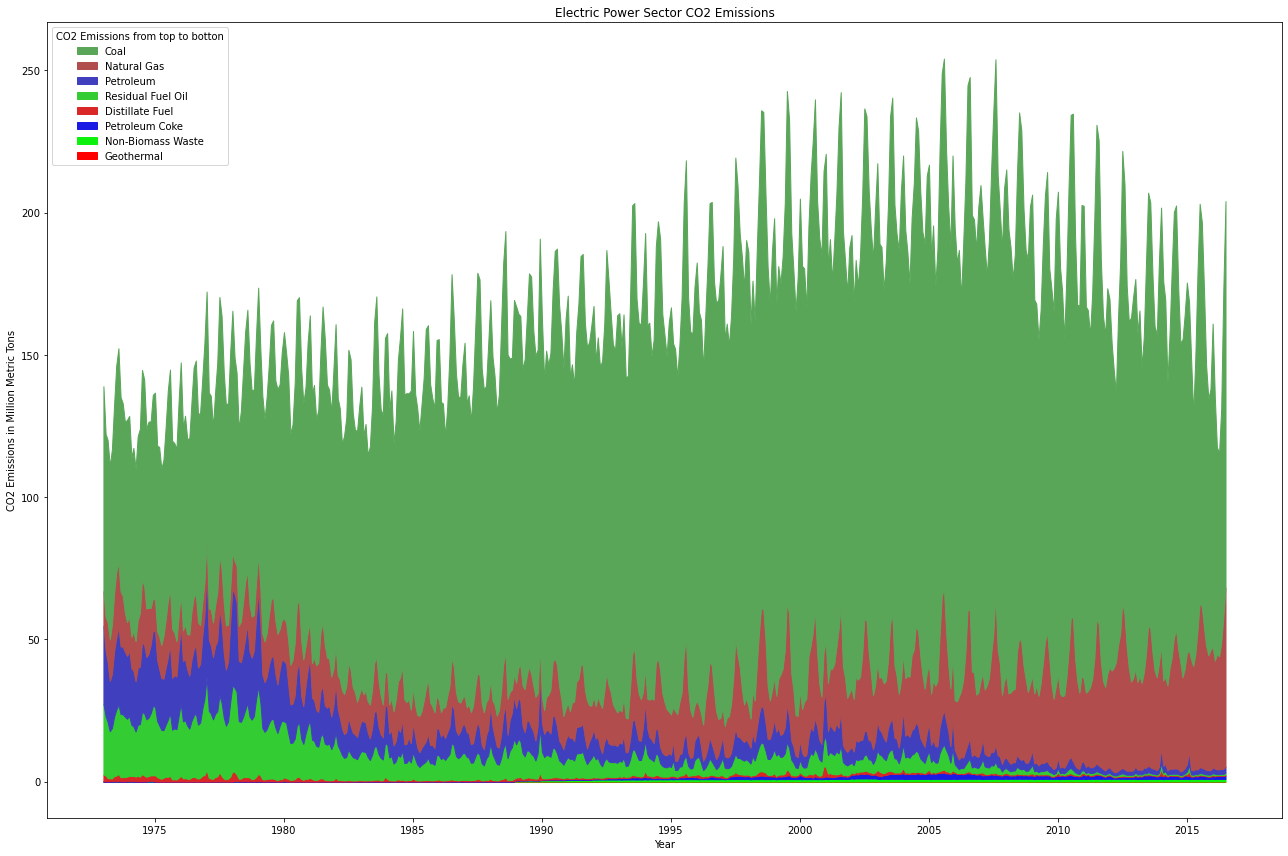

In [32]:
cols_sources = ['Geothermal', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal']
x = df2.index.unique()
y=[df2['Value'][df2['Source']=='Coal'].values-df2['Value'][df2['Source']=='Coal'].values]
fig, ax1 = plt.subplots(1,1,sharex=True, figsize=(18, 12))
r=1
g=0
b=0
color = []
for i in range(len(cols_sources)):
    if i%3==0:
        color = [r,g,b]
    elif i%3==1:
        color = [g,r,b]
    else:
        color = [g,b,r]
    y.append(df2['Value'][df2['Source']==cols_sources[i]].values)   
    ax1.fill_between(x, y[i], y[i+1]+y[i], color=(color), label=cols_sources[i])
    y[i+1]=y[i+1]+y[i]
    r = r-0.05
    g = g+0.05
    b = b+0.05
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(reversed(handles), reversed(labels), title='CO2 Emissions from top to botton', loc='upper left')
plt.title('Electric Power Sector CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions in Million Metric Tons')
fig.tight_layout()
#plt.savefig('eletricpowersectorco2emissions.png', dpi=300)


**Observations and Insights:**

-	There are 8 sources of CO2.
-	As expected, CO2 emissions follow a seasonality, with higher values in the periods of the year with lower and higher temperatures. Especially during the summer, the emissions are higher due to the higher energy demand.
-   According to the graphic Electric Power Sector CO2 Emissions, we can observe the following points:
    *	Coal emissions have decreased since the year 2009.
    *	Natural Gas emissions have increased constantly since the year 1990.
    *	Emissions from Petroleum-based fuels have decreased.



#### **Visualize the trend of CO2 emission from each energy source individually**

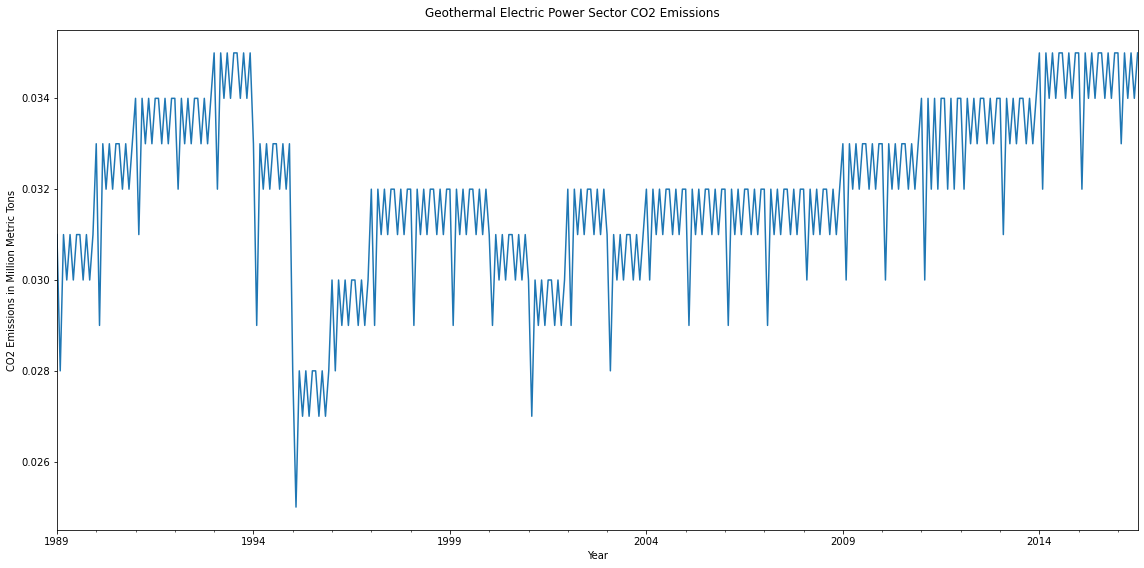

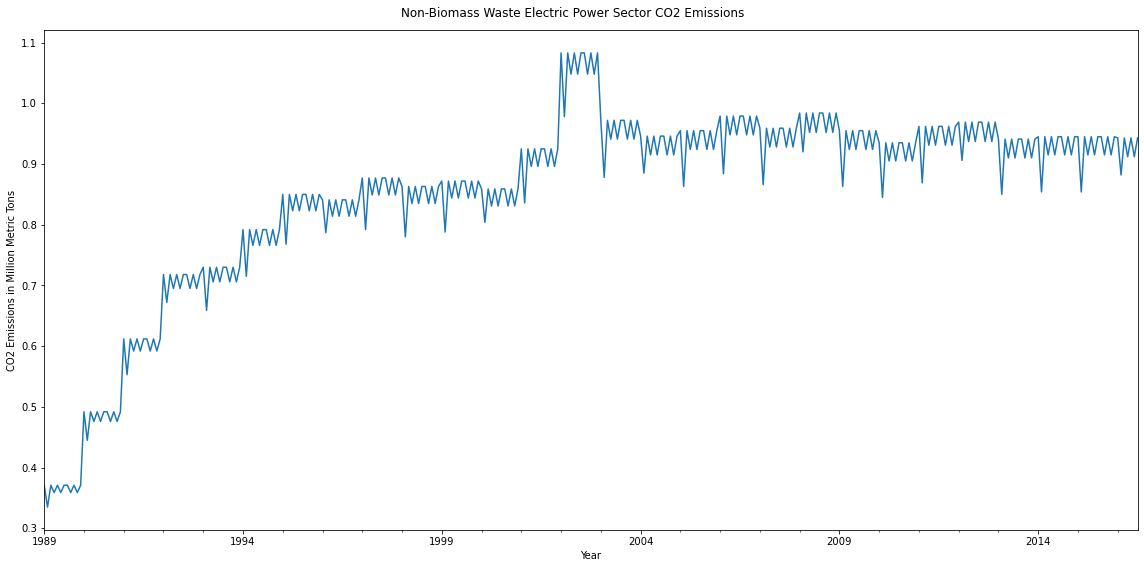

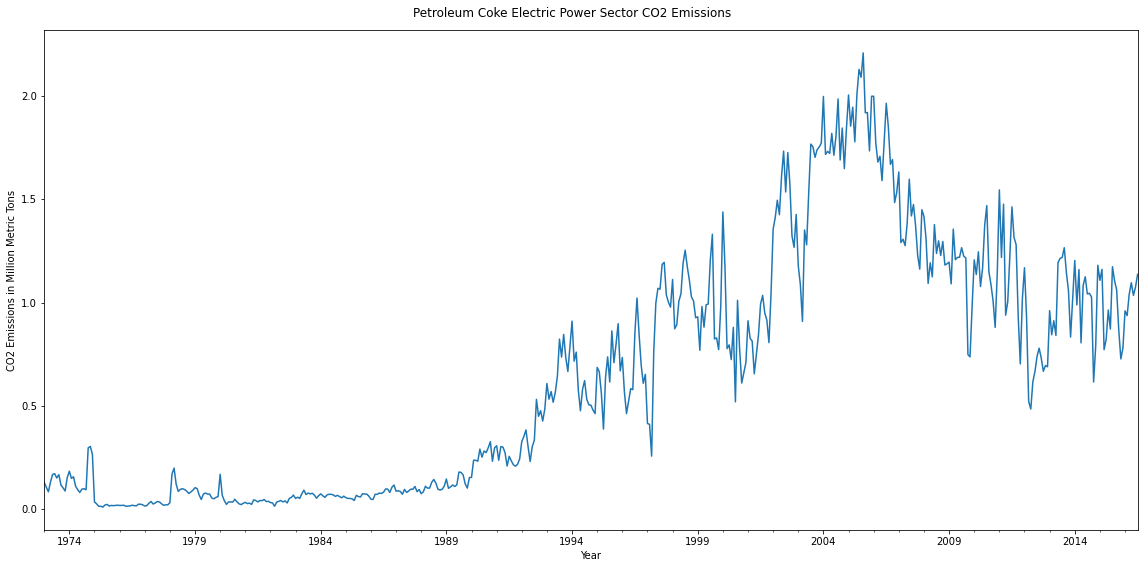

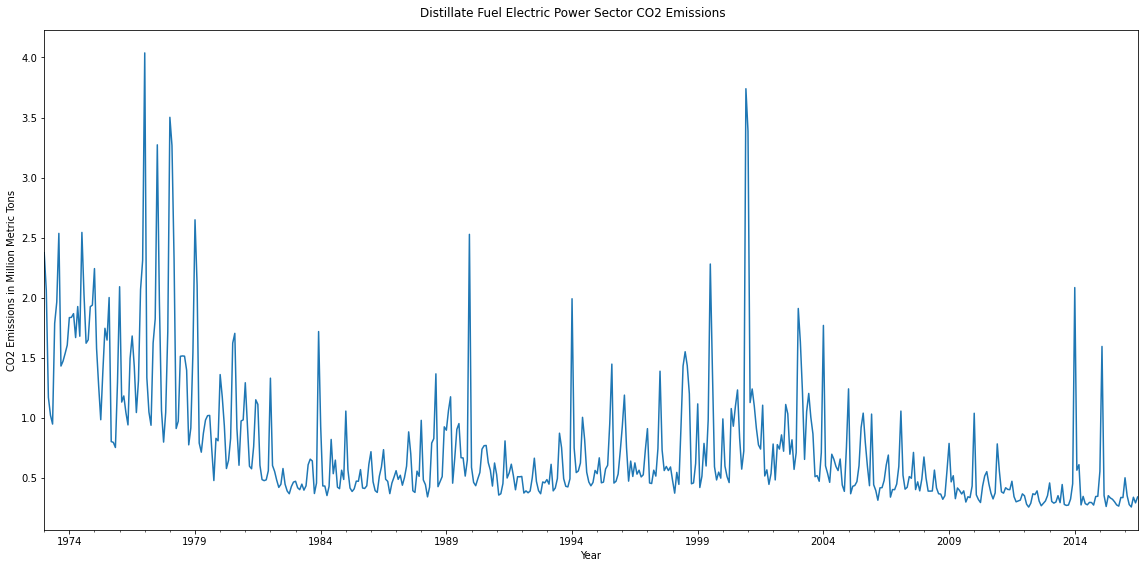

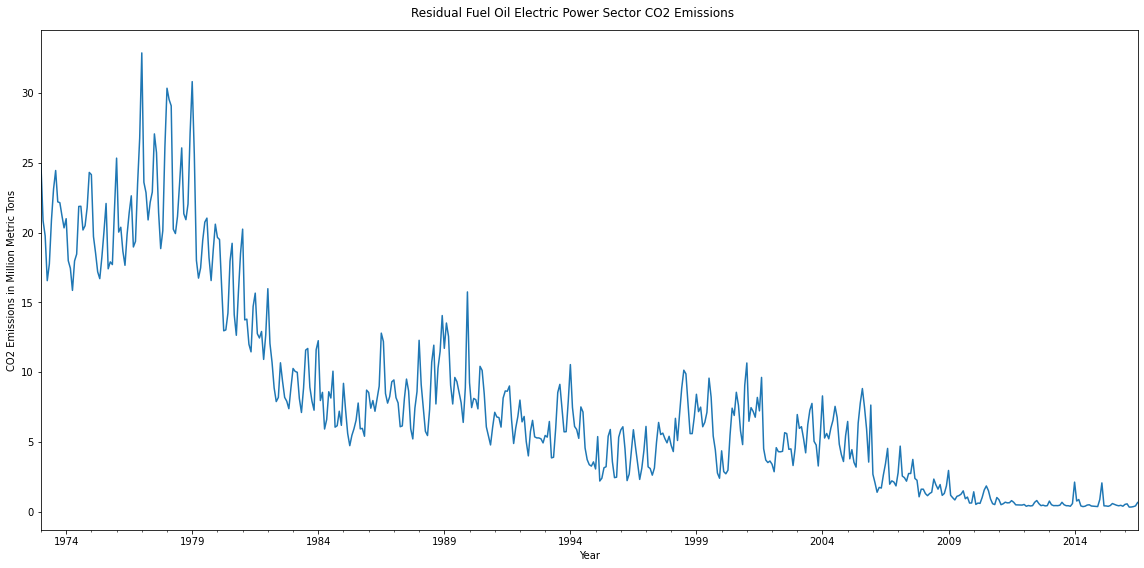

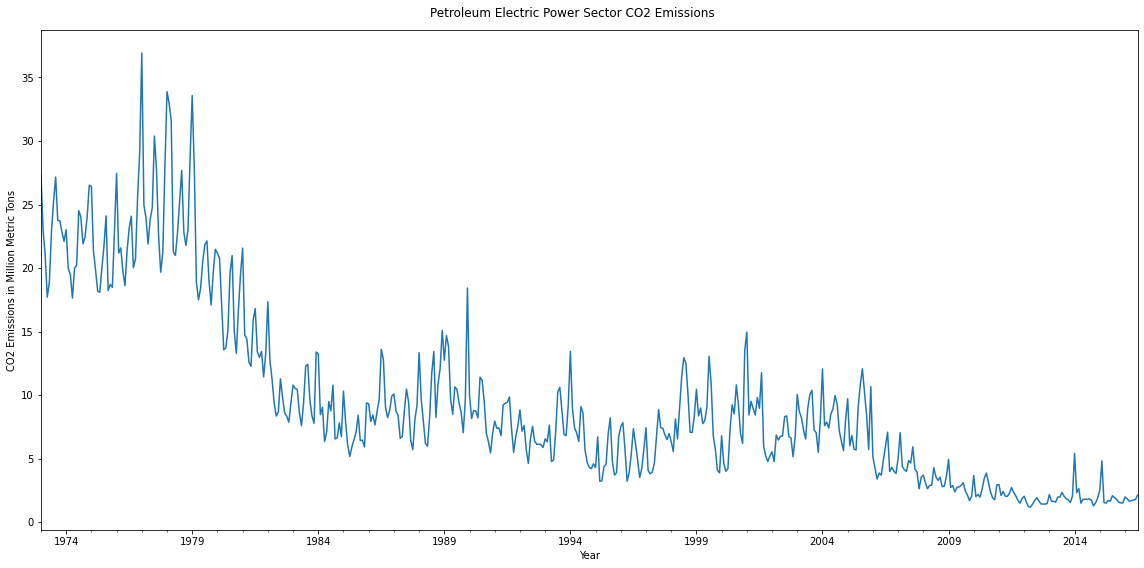

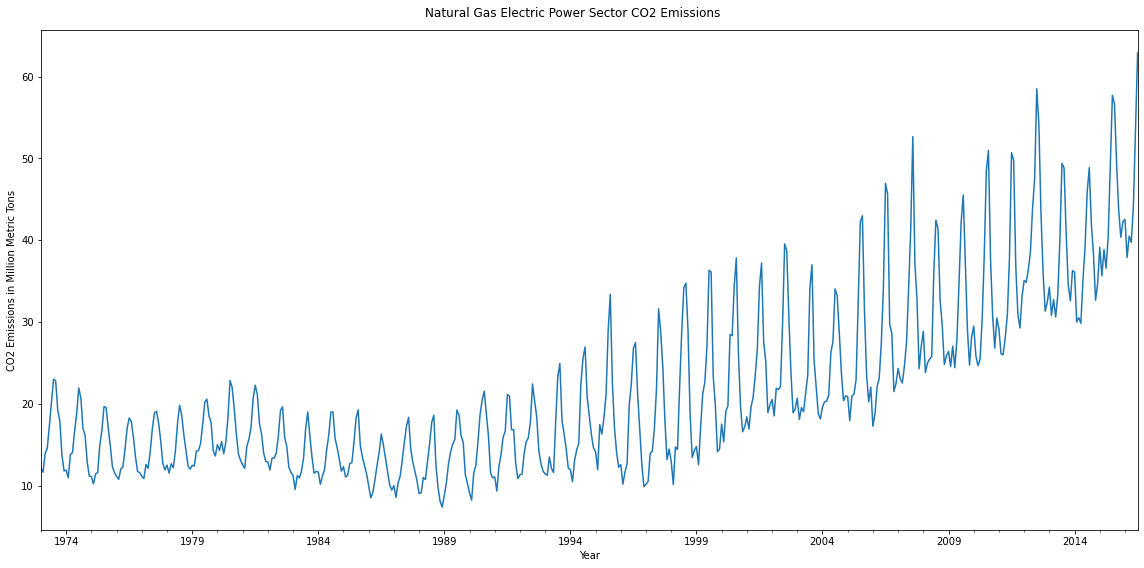

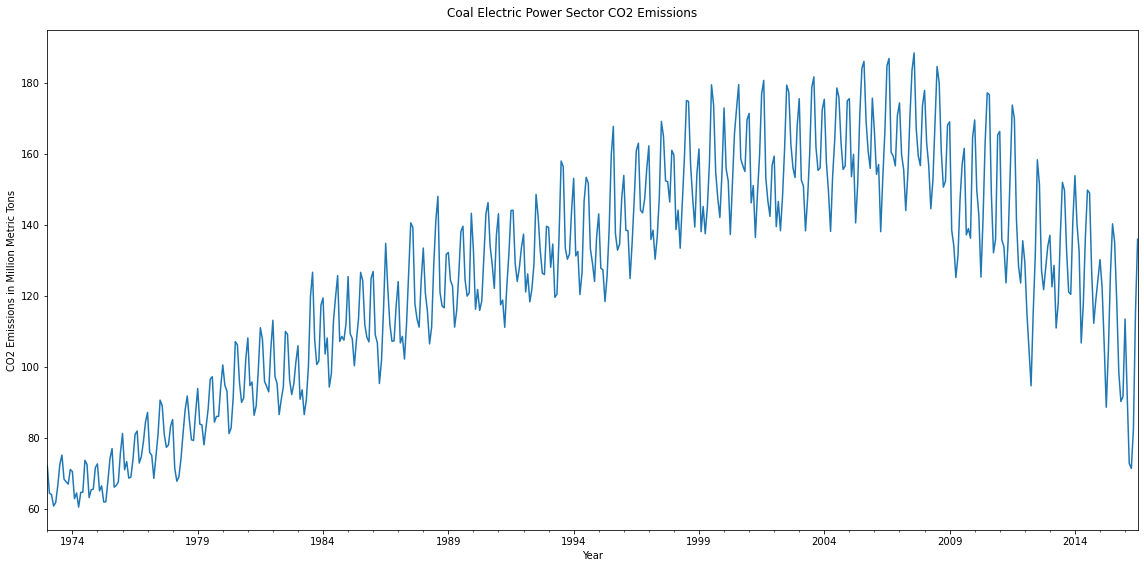

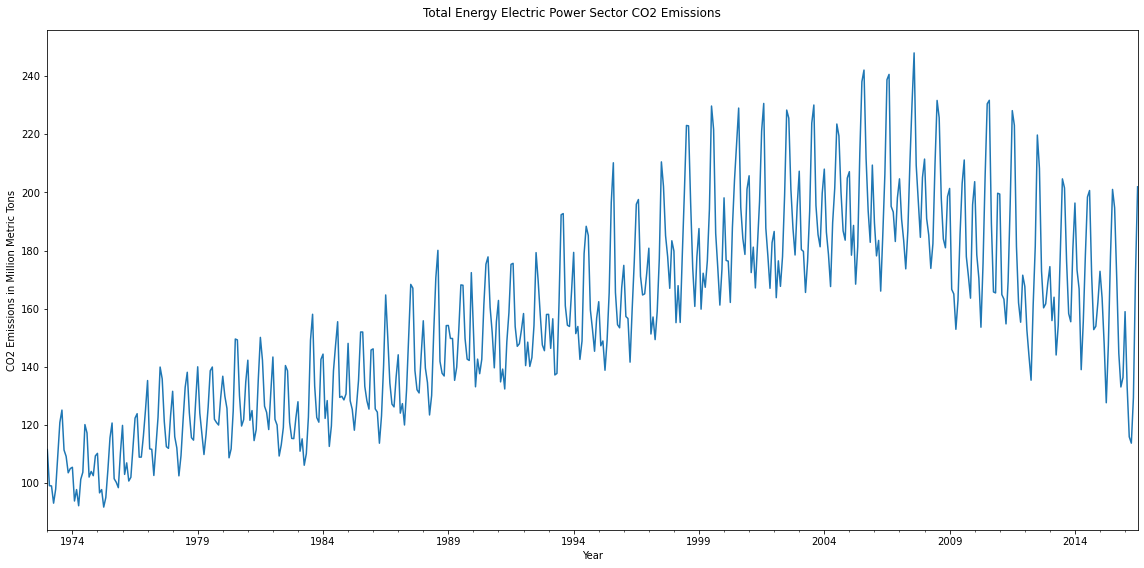

In [33]:
###Code here
# creating a subplot space
i = 0
for column in cols:
    fig, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(16,8), constrained_layout=True)
    plt.suptitle(column+ ' Electric Power Sector CO2 Emissions')
    ts['Value'][ts['Source']==column].plot(ax=ax1)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('CO2 Emissions in Million Metric Tons')
    fig.tight_layout()
    #plt.savefig('individual_'+column+'.png', dpi=300)

# showing the plot

plt.show()


#### Observations and Insights:

-	According to the graphics, we can observe the following points:
    *	Geothermal Electric emissions are minimal and follow an almost neutral trend.
    *	Non-Biomass Waste emissions are minimal and stabilized a neutral trend after 1994.
    *	Petroleum Coke emissions increased after 1994 but are still very small.
    *	Distillate Fuel emissions decreased from 1974 to 1984, have some seasonal increases but are still low.
    *	Residual Fuel Oil and Petroleum emissions have decreased since 1973.
    *	 As previously observed, Natural Gas Emissions have been increasing in a positive trend since the ’90s.
    *	Coal emissions followed a positive trend until 2008. Since then, they have been decreasing in a negative trend.
    *	Total Energy followed a positive trend until 2008. Since then, they have been decreasing in a negative trend.



#### Bar chart of CO2 Emissions per energy source

In [34]:
CO2_per_source = ts[ts['Source']!='Total Energy'].groupby('Source')['Value'].sum().sort_values().to_frame().reset_index()
CO2_per_source

Source      Value
0         Geothermal     10.563
1  Non-Biomass Waste    281.367
2     Petroleum Coke    338.785
3    Distillate Fuel    404.887
4  Residual Fuel Oil   4239.312
5          Petroleum   4982.993
6        Natural Gas  11295.359
7               Coal  65782.393

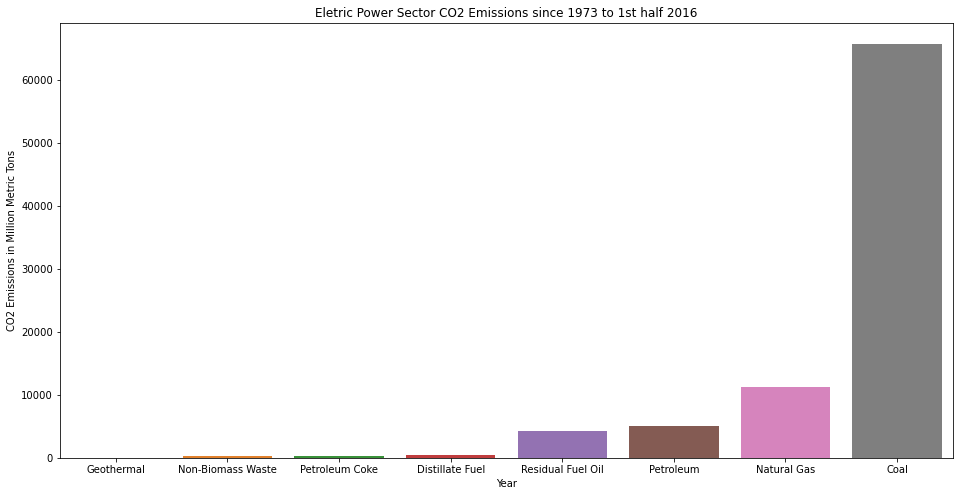

In [35]:
##Code here
plt.figure(figsize=(16,8))
plt.title('Eletric Power Sector CO2 Emissions since 1973 to 1st half 2016')
sns.barplot(data=CO2_per_source, x = 'Source', y = 'Value')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions in Million Metric Tons')
fig.tight_layout()
plt.savefig('barplot_emissionssince1973_2016.png', dpi=300)
plt.show()

In [36]:
#Checking the parcel for each source composing Total Emissions.
#Petroleum does not add to column Total Emissions.
CO2_per_source_wo_Total_Petroleum = ts[ts.index.year <= 2008].groupby('Source')['Value'].sum().sort_values()
CO2_per_source_wo_Total_Petroleum.drop(['Total Energy'], axis=0, inplace=True)
CO2_per_source_Tot = pd.DataFrame([CO2_per_source_wo_Total_Petroleum], index = ['Source of Emission'])
CO2_per_source_Tot

Source              Geothermal  Non-Biomass Waste  Petroleum Coke  \
Source of Emission       7.519            196.536         245.288   

Source              Distillate Fuel  Residual Fuel Oil  Petroleum  \
Source of Emission          367.748            4175.25   4788.292   

Source              Natural Gas       Coal  
Source of Emission     7882.597  53802.098

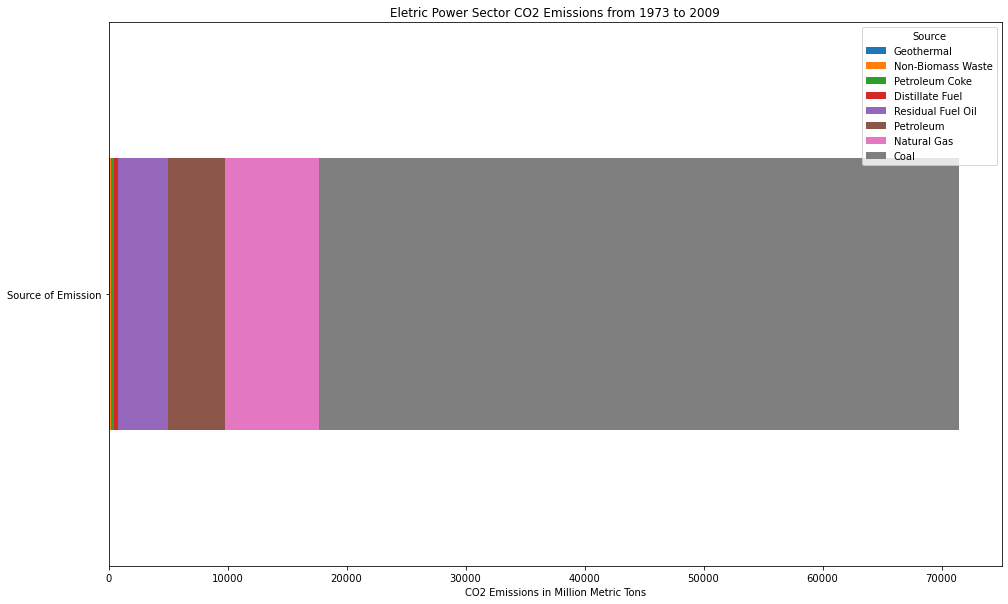

In [37]:
CO2_per_source_Tot.plot(kind='barh', stacked=True, figsize=(16,10), title='Eletric Power Sector CO2 Emissions from 1973 to 2009')
plt.xlabel('CO2 Emissions in Million Metric Tons')
fig.tight_layout()
#plt.savefig('barplot_emissionssince1973_2009.png', dpi=300)
plt.show()

In [38]:
#Checking the parcel for each source composing Total Emissions since 2010
#Petroleum does not add to column Total Emissions.
CO2_per_source_wo_Total_Petroleum2 = ts[ts.index.year > 2009].groupby('Source')['Value'].sum().sort_values()
CO2_per_source_wo_Total_Petroleum2.drop(['Total Energy'], axis=0, inplace=True)
CO2_per_source_Tot2 = pd.DataFrame([CO2_per_source_wo_Total_Petroleum2], index = ['Source of Emission'])
CO2_per_source_Tot2

Source              Geothermal  Distillate Fuel  Residual Fuel Oil  \
Source of Emission       2.655           32.049             49.803   

Source              Non-Biomass Waste  Petroleum Coke  Petroleum  Natural Gas  \
Source of Emission             73.587          80.033    161.889      3040.25   

Source                  Coal  
Source of Emission  10239.42

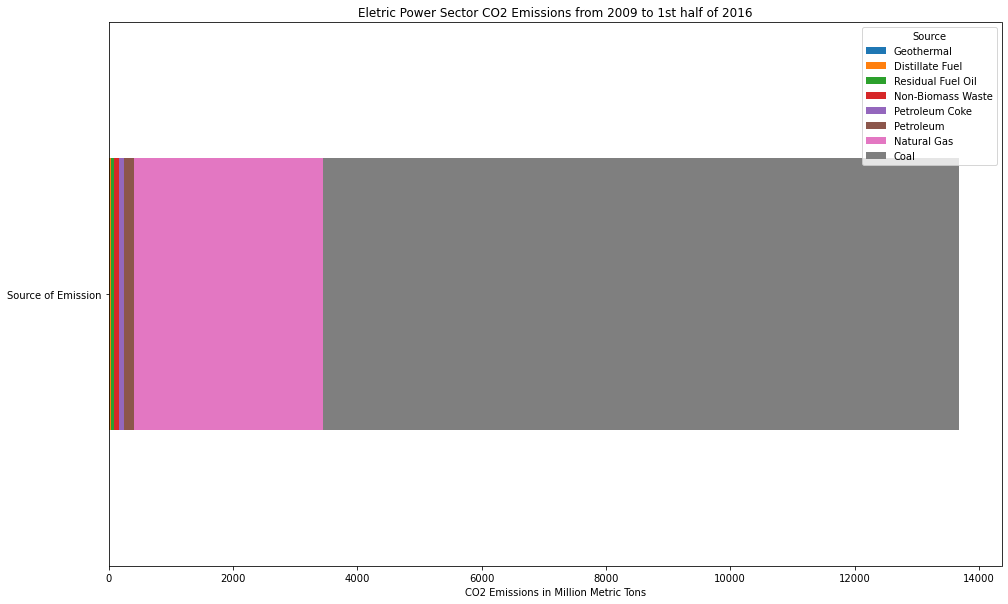

In [39]:
CO2_per_source_Tot2.plot(kind='barh', stacked=True, figsize=(16,10), title='Eletric Power Sector CO2 Emissions from 2009 to 1st half of 2016')
plt.xlabel('CO2 Emissions in Million Metric Tons')
#plt.savefig('barplot_emissionssince2009_2016.png', dpi=300)
plt.show()

#### **Observations and Insights:**

*	Coal, followed by Natural Gas, was the primary source of CO2 emissions until 2016.
*	Petroleum-based fuels had significant participation in CO2 emissions until the year 2008.
*	Natural Gas has increased its participation in CO2 emissions since the year 2009.
*	In general, we can see that Petroleum-based fuels have dramatically decreased participation in CO2 emissions, and Coal has been following that negative trend. It looks that Natural Gas has replaced those sources. This replacement is a good trade-off because Natural Gas generates the same energy with less CO2 emissions.


#### For developing the time series model and forcasting, use the natural gas CO2 emission from the electirical power generation


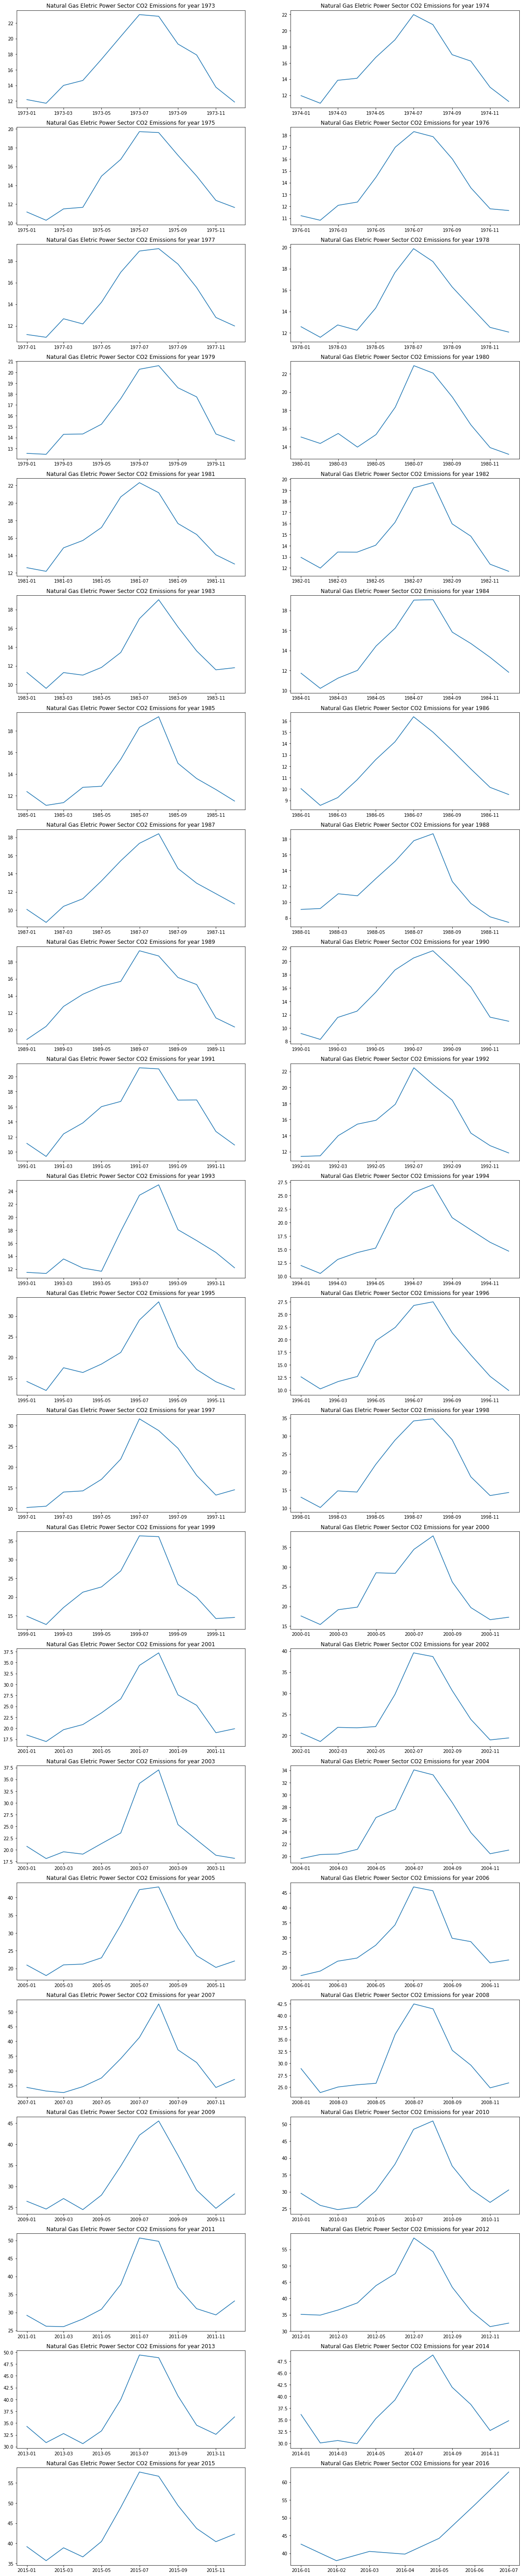

In [40]:
source = 'Natural Gas'
yearmin = ts.index.year.min()
yearmax = ts.index.year.max()
year = yearmin
plt.figure(figsize=(20,200))
plt.xlabel('Month and Year')
plt.ylabel('CO2 Emissions in Million Metric Tons of Carbon Dioxide')
for i in range(yearmax-yearmin+1):
    plt.subplot(42,2,i+1)
    plt.title(source+' Eletric Power Sector CO2 Emissions for year '+ str(year+i))
    plt.plot(ts['Value'][(ts['Source']==source) & (ts.index.year == year+i)])
fig.tight_layout()
fig.show()
#plt.savefig('naturalgas-emissions78_83.png', dpi=300)

In [41]:
tsgroup= ts.groupby(['Source', pd.Grouper(freq="M")])['Value'].sum().unstack(level = 0)
tsNaturalGas = tsgroup['Natural Gas'] # monthly total emissions (mte)
tsNaturalGas.head()

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: M, Name: Natural Gas, dtype: float64

In [42]:
tsNaturalGas.tail()

YYYYMM
2016-03-31    40.525
2016-04-30    39.763
2016-05-31    44.210
2016-06-30    53.567
2016-07-31    62.881
Freq: M, Name: Natural Gas, dtype: float64

In [43]:
tsNaturalGas.shape

(523,)

#### Observations & insights:

-	Natural Gas CO2 emissions has a similar yearly trend. That can indicate a relation with some latent variable. At a first glance, it looks like the emissions are following the seasonal temperatures variation 
-	We have created a data frame (tsNaturalGas) with the Natural Gas CO2 emissions values from 1973 to Jul 2016 to work in the Time Series models. The data has 523 months.




## Proposed approach

- **Potential techniques** 


- We can observe that the data has the following features:
    -	A sequence of the same variable measurements over time.
    -	Measurements are made in regular intervals.
    -	The data is time dependent.
    -	Ordering is essential to the data structure.
- According to this scenario, Time series models are indicated to deal with the problem.
- We will use the following techniques to find the model that best fits our forecasting needs.
    -	AR – Autoregressive models.
    -	MA – Moving Average models.
    -	ARMA – mixed autoregressive moving average models.
    -	ARIMA – integration models.
    -	SARIMA – seasonal models.


- **Overall solution design**

- **Reason** - The reason behind the decision to choose the above models is that as we see the data has all features of a Time Series solution. We will try those models trying to identify the best one.

- We will follow the following solution design:
    1. Check the trend, seasonality, and white noise for the time series.
    2. Split the dataset into Test and Train data.
    3. Check stationarity. We will identify non-stationarity using the Augmented Dicky-Fuller Test (ADF).
    4. We will identify hyperparameter values for AR, MA, and ARMA, plotting Partial Autocorrelation Estimate (PACF) and Autocorrelation Function (ACF).
    5. Model the Time Series automatically using the auto-arima model from pmdarima to see preliminary hyperparameters.
    6. Build AR, MA, and ARMA models using the stationary data.
    7. Build ARIMA and SARIMA models using the train data.
    8. Analyze and evaluate the chosen model.
    9. Use the selected model to forecast 12 months, starting in August/2016.


- **Measures of success**

To compare the potential techniques/models, we will use Akaike’s Information Criteria (**AIC**) and Root Mean Squared Error (**RMSE**)

- **Reason** - The reason to use those above is because we can have a meaningful and accurate measure of error with RMSE, but that can lead to overfitting. To help prevent this problem we will use AIC.

We will use RMSE to measures how far the forecasts are compared to the actual values in the Time Series, disregarding the model’s complexity.

RMSE is very accurate but can lead to overfitted models. To help prevent that, we will use AIC as another model measurement. AIC penalizes more complex models allowing a trade-off between a complex but accurate model against a simpler but reasonably accurate model.

That said, we will be looking for lower RMSE and AIC values.


# Milestone 2

## Refined Insights
According to the data we can see the following:

    1 - Coal and Natural Gas are the most relevant source of CO2 in the electric power sector.
       
       The reason for that is that Coal is historically one of the first large sources of electric power, and Natural Gas is a source that have increased its presence because of the better ratio regarding energy produced and CO2 emissions.
        
        We need to understand their emission evolution to understand the problem.
        
    2 - The decrease in Coal emissions and the increase of Natural Gas emissions indicate that the latter is replacing the former.
    
        The reason behind that, as explained above, is that Natural gas is more efficient in energy production regarding CO2 emissions.
        
        This feature makes it essential understanding Natural Gas emissions to forecast CO2 emissions, as it is trending upward to be the most relevant factor.
        
    3 - Natural Gas CO2 emission in electric power sector has a seasonal behavior.
        	
        This happens, probably, because there are certain periods of the year when the demand for energy is higher than other especially in the high temperature months. This increase of demand can be related to refrigeration needs, increase in the agricultural activity and production activity, etc.
        
        It is necessary to take the seasonality in account, to find a model that can understand and predict it.
        
	4 – Replace other sources of CO2 emissions with Natural Gas is a good choice, because of the better relation of emissions/energy-produce of Natural Gas.
    
        It is a good solution until we can adopt a clean alternative.



### Natural gas based CO2 emission forecasting

For developing the time series model and forecasting, you are expected to use the natural gas CO2 emission from the electrical power generation. We need to slice this data:

### Visualizing the Time Series and decomposing it

#### Visualizing the Time Series

In [44]:
# Monbthly Natural Gas CO2 emissions from electrical power generation from 1973 to July 2016
tsNaturalGas.head()

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: M, Name: Natural Gas, dtype: float64

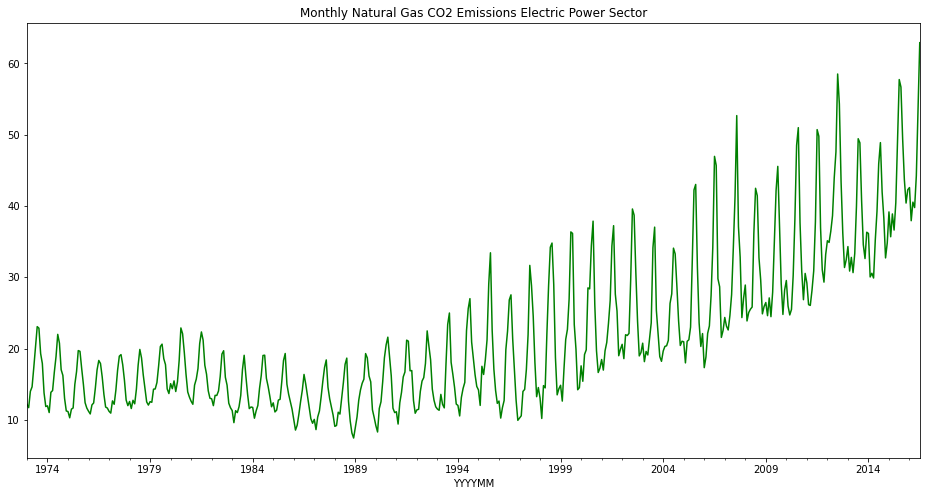

In [45]:
ax = tsNaturalGas.plot(color='g', figsize = (16,8))
ax.set_title('Monthly Natural Gas CO2 Emissions Electric Power Sector')
plt.show()

#### Decomposing the Time Series

In [46]:
# using seasonal_decompose function to decompose the time series into its individual components
decomposition = sm.tsa.seasonal_decompose(tsNaturalGas)

In [47]:
# creating an empty dataframe to store the individual components
decomposed_data = pd.DataFrame()

# extracting the trend component of time series
decomposed_data['trend'] = decomposition.trend

# extracting the seasonal component of time series
decomposed_data['seasonal'] = decomposition.seasonal

# extracting the white noise or residual component of time series
decomposed_data['random_noise'] = decomposition.resid

#### Plotting the individual components

Text(0.5, 1.0, 'White noise')

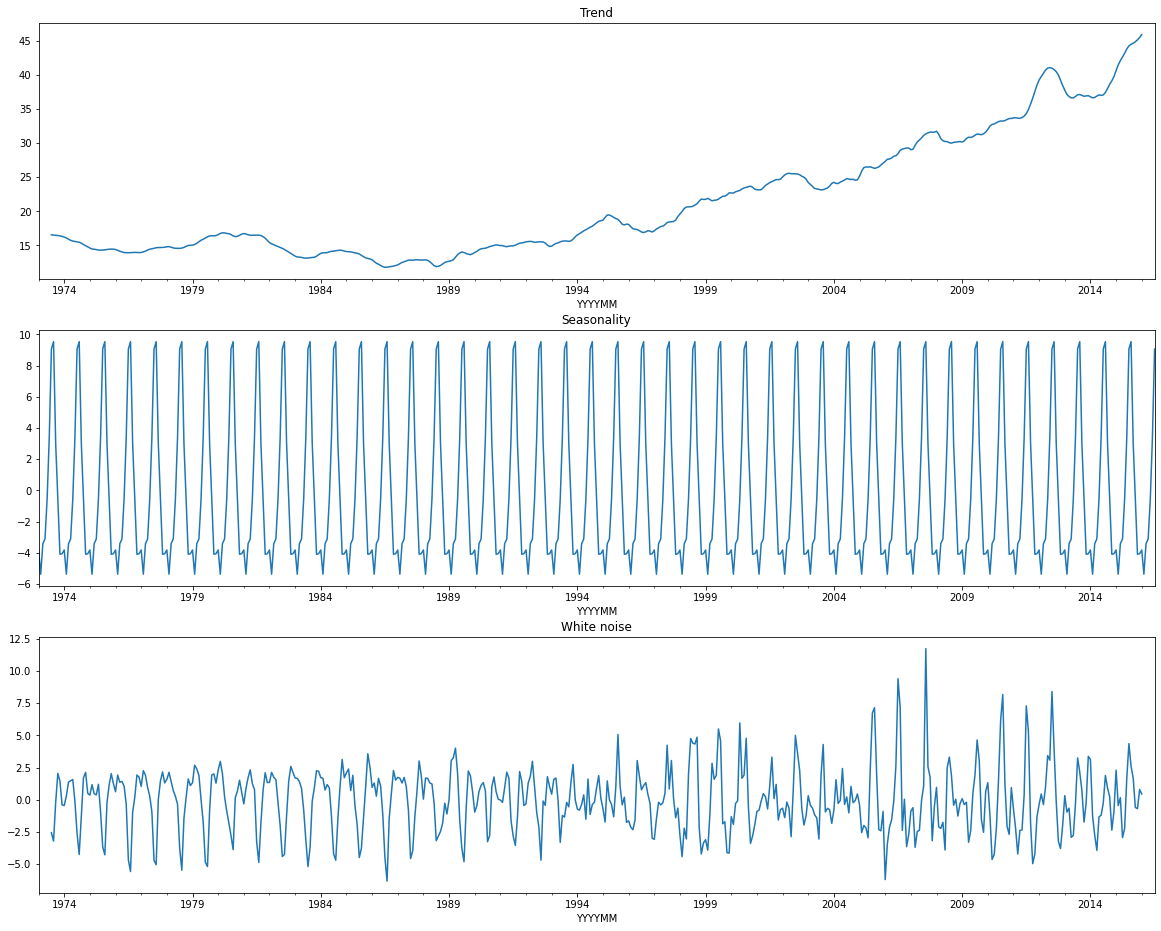

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20, 16))
decomposed_data['trend'].plot(ax=ax1)
decomposed_data['seasonal'].plot(ax=ax2)
decomposed_data['random_noise'].plot(ax=ax3)
ax1.set_title('Trend')
ax2.set_title('Seasonality')
ax3.set_title('White noise')

#### Spliting the Data
- As we are going to forecast 12 months we will split the data in We will use 24 months as Test Data and 499 months as the Train Data

In [49]:
ts_train, ts_test = tsNaturalGas.iloc[:-24], tsNaturalGas.iloc[-24:]

In [50]:
ts_test.head()

YYYYMM
2014-08-31    48.871
2014-09-30    41.961
2014-10-31    38.286
2014-11-30    32.703
2014-12-31    34.800
Freq: M, Name: Natural Gas, dtype: float64

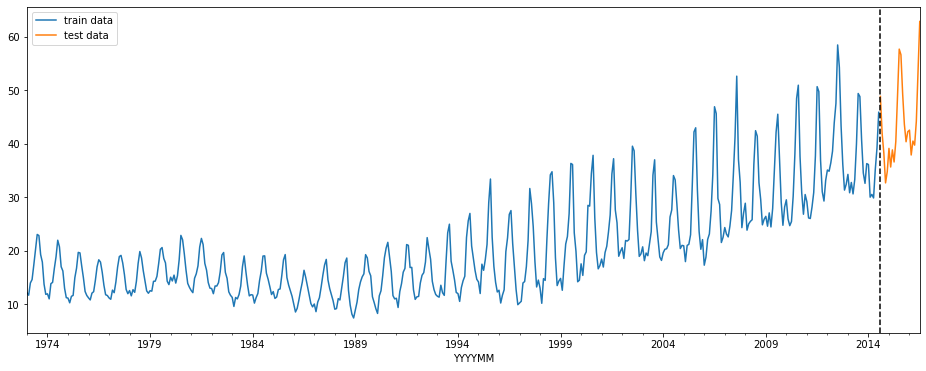

In [51]:
# creating a subplot space
fig, ax = plt.subplots(figsize=(16, 6))

# plotting train data
ts_train.plot(ax=ax)

# plotting test data
ts_test.plot(ax=ax)

# adding the legends in sequential order
plt.legend(['train data', 'test data'])

# showing the time which divides the original data into train and test
plt.axvline(x='2014-08-31', color='black', linestyle='--')

# showing the plot
plt.show()

#### Visualizing the rolling mean and standard deviaton in the Train Data

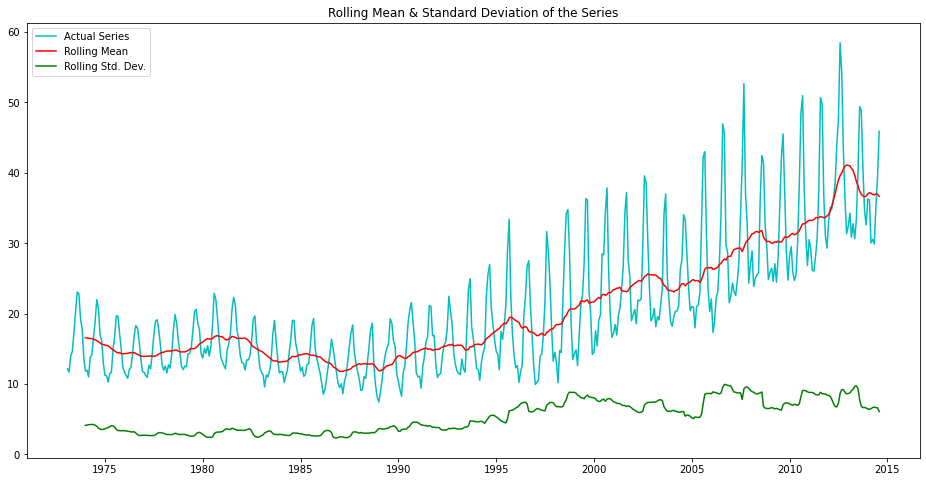

In [52]:
#Calculating the rollingmean and the standard deviation
rolmean=ts_train.rolling(window = 12).mean()
rolstd=ts_train.rolling(window = 12).std()

#Visualizing the rolling mean and standard deviation

plt.figure(figsize=(16,8))
actual = plt.plot(ts_train, color='c', label='Actual Series')
rollingmean = plt.plot(rolmean, color='red', label='Rolling Mean') 
rollingstd = plt.plot(rolstd, color='green', label='Rolling Std. Dev.')
plt.title('Rolling Mean & Standard Deviation of the Series')
plt.legend()
plt.show()

#### Observations and Insights: 
* The Time Series have significant Trend, Seasonality and residual components (white noise).
* We have previously observed, the Seasonality plot confirms the spike of Natural Gas emissions in July and August.
* The plot indicates the Time Series is not stationary. We will check using the Augmented Dicky-fuller Test.

#### Test the ststionarity using Augmented Dickey-Fuller Test (ADF)

**Augmented Dickey-Fuller (ADF) Test** to verify if the series is stationary or not. The null and alternate hypotheses for the ADF Test are defined as:

**- Null hypothesis:** The Time Series is non-stationary


**- Alternative hypothesis:** The Time Series is stationary

In [53]:
# implementing ADF test on the original time series data
result = adfuller(ts_train)

#Printing the results
print('Dickey-Fuller Test')
print('Test statisitic: ',result[0])
print('pvalue: ',result[1])
print('Critical Values: ',result[4])

Dickey-Fuller Test
Test statisitic:  0.4350967300288321
pvalue:  0.98276103743539
Critical Values:  {'1%': -3.4439615820186846, '5%': -2.8675425624806605, '10%': -2.5699671340268937}


#### Observations and Insights: 
* pvalue is ~0.98 witch is higher than 0.05. Hence, the rejection of the null hypothesis failed and we can say that the time series is non-stationary.

#### Making a first order differencing, and checking if the time series becomes stationary.

In [96]:
# taking 1st order differencing of the timeseries
ts_train_stationary = ts_train.diff().dropna()


#### Visualizing the series after first order differencing and making the ADF test

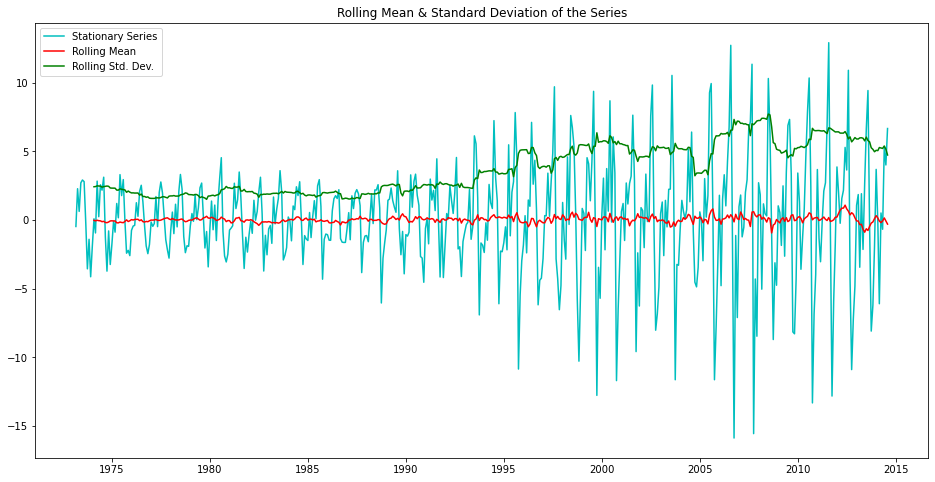

In [55]:
#Calculating the rollingmean and the standard deviation
rolmean=ts_train_stationary.rolling(window = 12).mean()
rolstd=ts_train_stationary.rolling(window = 12).std()

#Visualizing the rolling mean and standard deviation

plt.figure(figsize=(16,8))
actual = plt.plot(ts_train_stationary, color='c', label='Stationary Series')
rollingmean = plt.plot(rolmean, color='red', label='Rolling Mean') 
rollingstd = plt.plot(rolstd, color='green', label='Rolling Std. Dev.')
plt.title('Rolling Mean & Standard Deviation of the Series')
plt.legend()
plt.show()

In [56]:
# implementing ADF test on the first order differenced time series data
result = adfuller(ts_train_stationary)


# printing the results
print('Dickey-Fuller Test')
print('Test statisitic: ',result[0])
print('pvalue: ',result[1])
print('Critical Values: ',result[4])

Dickey-Fuller Test
Test statisitic:  -5.844470499426113
pvalue:  3.711347547347229e-07
Critical Values:  {'1%': -3.44407586647939, '5%': -2.867592847097137, '10%': -2.5699939338217668}


In [92]:
ts_log = np.log(ts_train)

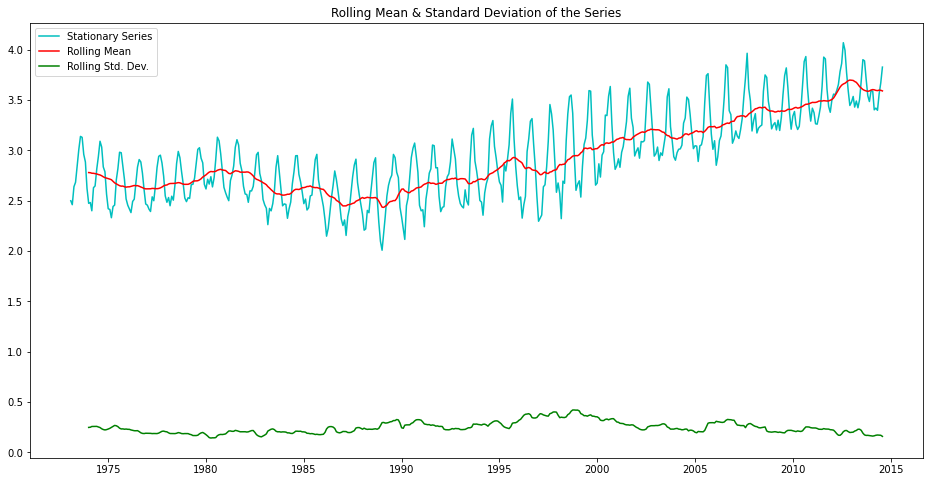

In [93]:
#Calculating the rollingmean and the standard deviation
rolmean=ts_log.rolling(window = 12).mean()
rolstd=ts_log.rolling(window = 12).std()

#Visualizing the rolling mean and standard deviation

plt.figure(figsize=(16,8))
actual = plt.plot(ts_log, color='c', label='Stationary Series')
rollingmean = plt.plot(rolmean, color='red', label='Rolling Mean') 
rollingstd = plt.plot(rolstd, color='green', label='Rolling Std. Dev.')
plt.title('Rolling Mean & Standard Deviation of the Series')
plt.legend()
plt.show()

In [94]:
# implementing ADF test on the first order differenced time series data
result = adfuller(ts_log)


# printing the results
print('Dickey-Fuller Test')
print('Test statisitic: ',result[0])
print('pvalue: ',result[1])
print('Critical Values: ',result[4])

Dickey-Fuller Test
Test statisitic:  0.10970443102699588
pvalue:  0.9667174488437588
Critical Values:  {'1%': -3.4440184853599876, '5%': -2.867567599912013, '10%': -2.5699804779975883}


In [97]:
ts_log_diff = ts_train.diff().dropna()

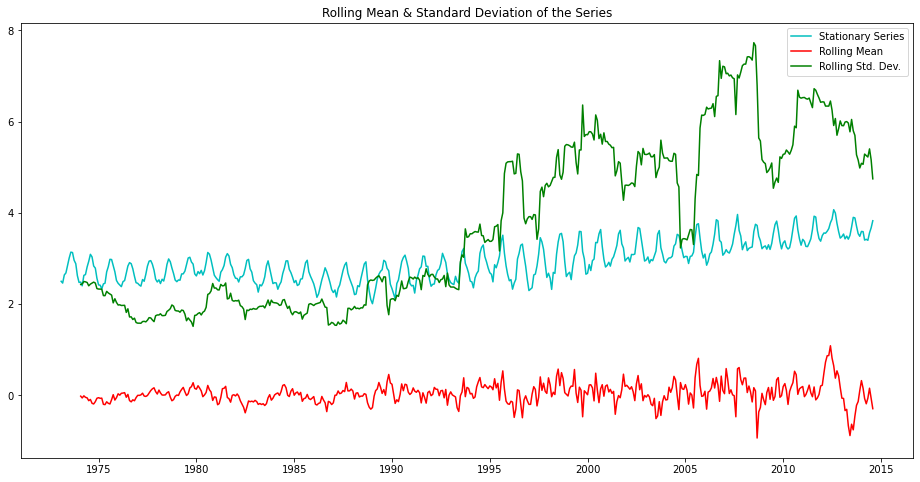

In [99]:
#Calculating the rollingmean and the standard deviation
rolmean=ts_log_diff.rolling(window = 12).mean()
rolstd=ts_log_diff.rolling(window = 12).std()

#Visualizing the rolling mean and standard deviation

plt.figure(figsize=(16,8))
actual = plt.plot(ts_log, color='c', label='Stationary Series')
rollingmean = plt.plot(rolmean, color='red', label='Rolling Mean') 
rollingstd = plt.plot(rolstd, color='green', label='Rolling Std. Dev.')
plt.title('Rolling Mean & Standard Deviation of the Series')
plt.legend()
plt.show()

In [101]:
# implementing ADF test on the first order differenced time series data
result = adfuller(ts_log_diff)


# printing the results
print('Dickey-Fuller Test')
print('Test statisitic: ',result[0])
print('pvalue: ',result[1])
print('Critical Values: ',result[4])

Dickey-Fuller Test
Test statisitic:  -5.844470499426113
pvalue:  3.711347547347229e-07
Critical Values:  {'1%': -3.44407586647939, '5%': -2.867592847097137, '10%': -2.5699939338217668}


#### Observations and Insights: 
* pvalue is ~3.71e-07 witch is lower than 0.05. Hence, we can reject the null hypothesis and we can say that the time series is stationary.

#### ACF and PCF Plots

ACF and PACF plots are used to identify the model's order in ARIMA models. These plots help to find the parameters `p` and `q`. Also we always plot the ACF and PACF plots after making the time series stationary.

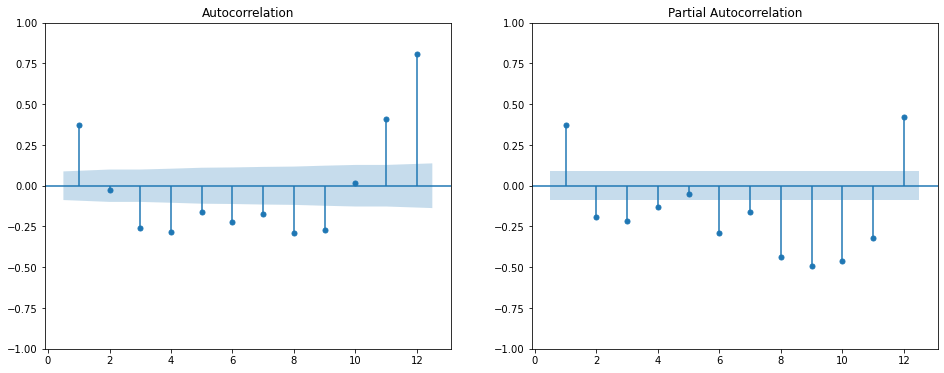

In [57]:
# creating two subplots to show ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# creating and plotting the ACF charts starting from lag=1
tsaplots.plot_acf(ts_train_stationary, zero=False, ax=ax1, lags=12)

# creating and plotting the ACF charts starting from lag=1 till lag=12
tsaplots.plot_pacf(ts_train_stationary, zero=False, ax=ax2, lags=12)

plt.show()

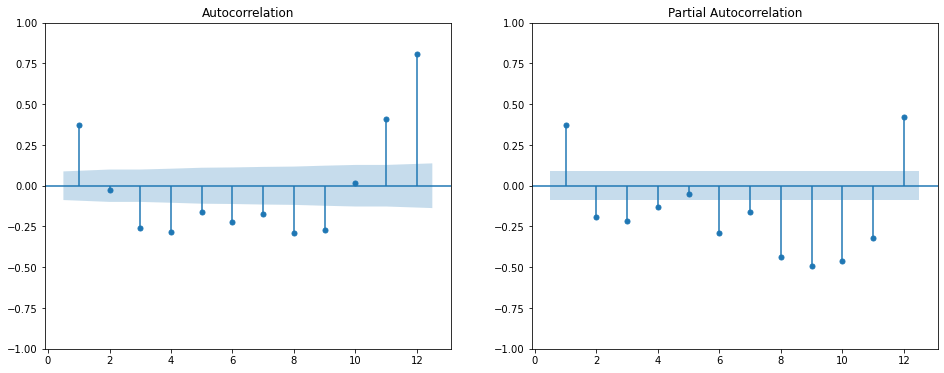

In [102]:
# creating two subplots to show ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# creating and plotting the ACF charts starting from lag=1
tsaplots.plot_acf(ts_log_diff, zero=False, ax=ax1, lags=12)

# creating and plotting the ACF charts starting from lag=1 till lag=12
tsaplots.plot_pacf(ts_log_diff, zero=False, ax=ax2, lags=12)

plt.show()

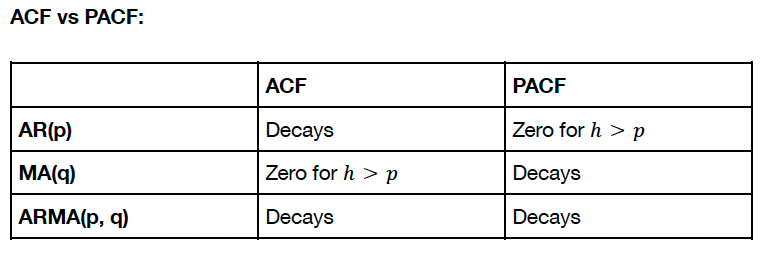

#### Observations and Insights:

* We can see that the above plot does not satisfie the table to indoicate the model to use. Tha can be and idication that we will need to use o different model. That seens logical as we see that the data has a strong seasonality componnent and AR, MA, and ARMA models does not especifically deal with that.

* We will use q = 10 and p = 11 as those values are relevant terms from the ACF and PACF plot, according to Nandakumar(2020).

#### Creating a function to check RMSE and AIC for the models

- Models that the values were differentiated

In [58]:
# for models that the values were differentiated
def plot_predicted_output_differencing(results, ax):
    
    # we are taking single cumulative sum of forecasted values (which is inverse of 1st order differencing)
    # and we are also adding the last element of training data to the forecasted values to get back to the original scale
    predictions = np.cumsum(results.predict(start=499, end=522)) + ts_train.iloc[-1]
    
    # setting indices of test data into prediction values
    predictions.index = ts_test.index
    
    # computing the AIC and RMSE metrics for the model and printing it into title of the plot
    ts_train.plot(ax=ax, label='train', 
                    title= 'AIC: {}'.format(np.round(results.aic, 2)) + 
                           ',    ' +
                           'RMSE: {}'.format(np.round(np.sqrt(mean_squared_error(ts_test, predictions)), 2)))
    # plotting the test data
    ts_test.plot(ax=ax) 
    
    # plotting the forecasted data
    predictions.plot(ax=ax)
    
    # adding the legends sequentially
    ax.legend(['train data', 'test data', 'forecasted values'])

- Models that the values were not differentiated

In [59]:
# for models that the values were not differentiated
def plot_predicted_output(results, ax):
    
    predictions = results.predict(start=499, end=522)
    
    # setting indices of test data into prediction values
    predictions.index = ts_test.index
    
    # computing the AIC and RMSE metrics for the model and printing it into title of the plot
    ts_train.plot(ax=ax, label='train', 
                    title= 'AIC: {}'.format(np.round(results.aic, 2)) + 
                           ',    ' +
                           'RMSE: {}'.format(np.round(np.sqrt(mean_squared_error(ts_test, predictions)), 2)))
    # plotting the test data
    ts_test.plot(ax=ax) 
    
    # plotting the forecasted data
    predictions.plot(ax=ax)
    
    # adding the legends sequentially
    ax.legend(['train data', 'test data', 'forecasted values'])

#### Creating the auto-arima model

In [108]:
auto_arima_model = auto_arima(ts_train, m=12, d = 1, seasonal=True, trace=True, 
                                 error_action='ignore', suppress_warnings=True, randon_state = 1, rmse = True)
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2023.495, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2787.904, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2233.786, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2511.885, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2786.050, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2370.501, Time=0.61 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2157.518, Time=1.09 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2031.161, Time=3.02 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2027.963, Time=2.39 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2499.365, Time=0.31 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2290.505, Time=1.96 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2084.780, Time=2.54 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=2028.506, Time=3.08 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2019.837, Time=0.88 sec
 ARIMA(1,1,2)(0,0,1

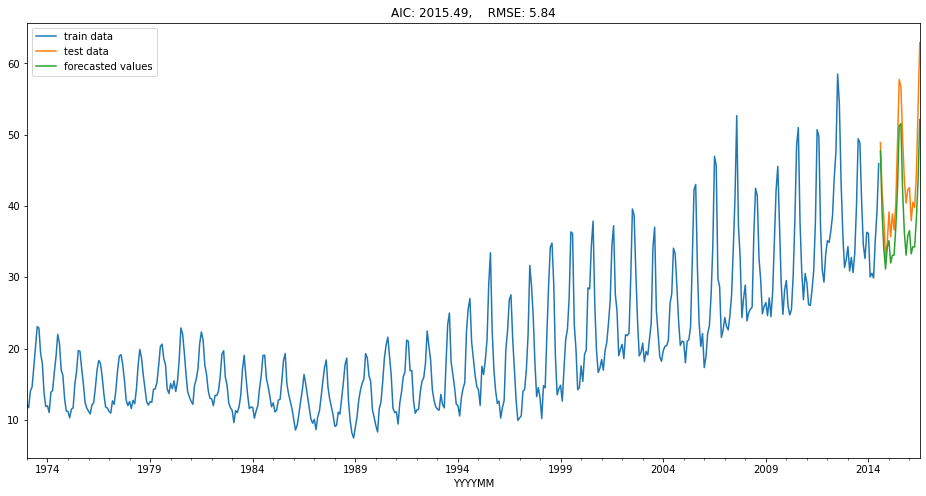

In [111]:
predictions, conf_int = auto_arima_model.predict(n_periods=ts_test.shape[0], return_conf_int=True)
predictions = pd.DataFrame(predictions, columns=['Natural Gas'], index = ts_test.index)
fig, ax = plt.subplots(figsize = (16,8))
# setting indices of test data into prediction values
# #predictions.index = ts_test.index

# computing the AIC and RMSE metrics for the model and printing it into title of the plot
ts_train.plot(ax=ax, label='train', 
                 title= 'AIC: {}'.format(np.round(auto_arima_model.aic(), 2)) + 
                        ',    ' +
                        'RMSE: {}'.format(np.round(np.sqrt(mean_squared_error(ts_test, predictions)), 2)))
# plotting the test data
ts_test.plot(ax=ax) 

# plotting the forecasted data
predictions.plot(ax=ax)

# adding the legends sequentially
ax.legend(['train data', 'test data', 'forecasted values'])

plt.show()

#### Ploting test and predicted data

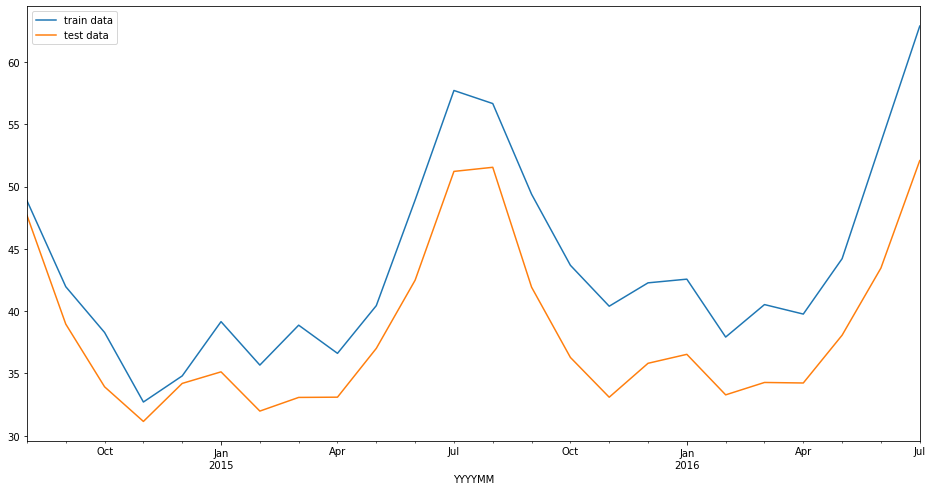

In [62]:

fig, ax = plt.subplots(figsize = (16,8))

# plotting 3 years from train data
train3 = ts_train.iloc[-36:]
#train3.plot(ax=ax)

# plotting the test data
ts_test.plot(ax=ax) 

# plotting the forecasted data
predictions.plot(ax=ax)

# adding the legends sequentially
ax.legend(['train data', 'test data', 'forecasted values'])

plt.show()

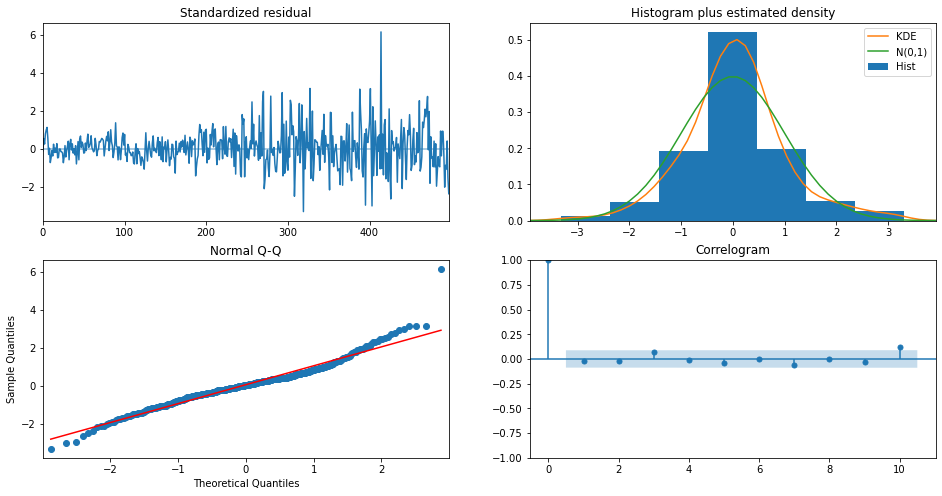

In [63]:
fig = plt.figure(figsize=(16,8))
fig = auto_arima_model.plot_diagnostics(fig=fig)

#### AR Modeling

We will test different values of p tp find the best pair of AIC and RMSE

In [64]:
# for models that the values were differentiated
def gridsearch_model(model_type, iteractions, d = 0):
    p = 0
    q = 0
    #check best hyperparameter model
    if model_type == 'AR':
        model = ARIMA(ts_train_stationary, order=(p, d, 0))
        model = model.fit()
        predictions = np.cumsum(model.predict(start=499, end=522)) + ts_train.iloc[-1]
        aic = np.round(model.aic, 2)
        rmse = np.round(np.sqrt(mean_squared_error(ts_test, predictions)), 2)
        print('Model AR p = {}'.format(p)+' AIC = {}'.format(aic)+' RMSE = {}'.format(rmse))
        for i in range(iteractions-1):
            model = ARIMA(ts_train_stationary, order=(i+1, d, 0))
            model = model.fit()
            predictions = np.cumsum(model.predict(start=499, end=522)) + ts_train.iloc[-1]
            aic = np.round(model.aic, 2)
            rmse = np.round(np.sqrt(mean_squared_error(ts_test, predictions)), 2)
            print('Model AR p = {}'.format(i+1)+' AIC = {}'.format(aic)+' RMSE = {}'.format(rmse))
    elif model_type == 'MA':
        model = ARIMA(ts_train_stationary, order=(0, d, q))
        model = model.fit()
        predictions = np.cumsum(model.predict(start=499, end=522)) + ts_train.iloc[-1]
        aic = np.round(model.aic, 2)
        rmse = np.round(np.sqrt(mean_squared_error(ts_test, predictions)), 2)
        print('Model MA q = {}'.format(q)+' AIC = {}'.format(aic)+' RMSE = {}'.format(rmse))
        for i in range(iteractions-1):
            model = ARIMA(ts_train_stationary, order=(0, d, i+1))
            model = model.fit()
            predictions = np.cumsum(model.predict(start=499, end=522)) + ts_train.iloc[-1]
            aic = np.round(model.aic, 2)
            rmse = np.round(np.sqrt(mean_squared_error(ts_test, predictions)), 2)
            print('Model MA q = {}'.format(i+1)+' AIC = {}'.format(aic)+' RMSE = {}'.format(rmse))
    elif model_type == 'ARMA':
        for ii in range(5):
            model = ARIMA(ts_train_stationary, order=(p, d, ii))
            model = model.fit()
            predictions = np.cumsum(model.predict(start=499, end=522)) + ts_train.iloc[-1]
            aic = np.round(model.aic, 2)
            rmse = np.round(np.sqrt(mean_squared_error(ts_test, predictions)), 2)
            print('Model ARMA p = {}'.format(p)+' q = {}'.format(ii)+' AIC = {}'.format(aic)+' RMSE = {}'.format(rmse))
        for i in range(iteractions-1):
            for ii in range(5):
                model = ARIMA(ts_train_stationary, order=(i+1, d, ii))
                model = model.fit()
                predictions = np.cumsum(model.predict(start=499, end=522)) + ts_train.iloc[-1]
                aic = np.round(model.aic, 2)
                rmse = np.round(np.sqrt(mean_squared_error(ts_test, predictions)), 2)
                print('Model ARMA p = {}'.format(i+1)+' q = {}'.format(ii)+' AIC = {}'.format(aic)+' RMSE = {}'.format(rmse))
    elif model_type == 'ARIMA':
        for ii in range(5):
            model = ARIMA(ts_train, order=(p, d, ii),enforce_stationarity=False, enforce_invertibility=False)
            model = model.fit()
            predictions = model.predict(start=499, end=522)
            aic = np.round(model.aic, 2)
            rmse = np.round(np.sqrt(mean_squared_error(ts_test, predictions)), 2)
            print('Model ARIMA p = {}'.format(p)+' q = {}'.format(ii)+  ' d = {}'.format(d)+' AIC = {}'.format(aic)+' RMSE = {}'.format(rmse))
        for i in range(iteractions-1):
            for ii in range(5):
                model = ARIMA(ts_train, order=(i+1, d, ii),enforce_stationarity=False, enforce_invertibility=False)
                model = model.fit()
                predictions = model.predict(start=499, end=522)
                aic = np.round(model.aic, 2)
                rmse = np.round(np.sqrt(mean_squared_error(ts_test, predictions)), 2)
                print('Model ARIMA p = {}'.format(i+1)+' q = {}'.format(ii)+  ' d = {}'.format(d)+' AIC = {}'.format(aic)+' RMSE = {}'.format(rmse))


In [65]:
model = sm.tsa.SARIMAX(ts_train, order=(5,1,1), enforce_stationarity=False, enforce_invertibility=False)
model.fit()

In [66]:
model = ARIMA(ts_train, order=(5,1,1), enforce_stationarity=False, enforce_invertibility=False)
model.fit()

In [67]:
gridsearch_model('AR', 24)

Model AR p = 0 AIC = 2787.9 RMSE = 8.05
Model AR p = 1 AIC = 2715.4 RMSE = 8.75
Model AR p = 2 AIC = 2699.51 RMSE = 7.73
Model AR p = 3 AIC = 2677.75 RMSE = 7.34
Model AR p = 4 AIC = 2670.96 RMSE = 7.45
Model AR p = 5 AIC = 2671.74 RMSE = 7.52
Model AR p = 6 AIC = 2629.58 RMSE = 8.41
Model AR p = 7 AIC = 2619.32 RMSE = 8.26
Model AR p = 8 AIC = 2516.78 RMSE = 7.9
Model AR p = 9 AIC = 2379.94 RMSE = 8.21
Model AR p = 10 AIC = 2257.37 RMSE = 8.62
Model AR p = 11 AIC = 2195.33 RMSE = 9.15
Model AR p = 12 AIC = 2118.35 RMSE = 8.84
Model AR p = 13 AIC = 2113.02 RMSE = 9.14
Model AR p = 14 AIC = 2101.21 RMSE = 9.39
Model AR p = 15 AIC = 2097.74 RMSE = 9.46
Model AR p = 16 AIC = 2099.02 RMSE = 9.47
Model AR p = 17 AIC = 2100.27 RMSE = 9.57
Model AR p = 18 AIC = 2098.45 RMSE = 9.44
Model AR p = 19 AIC = 2096.79 RMSE = 9.62
Model AR p = 20 AIC = 2098.73 RMSE = 9.61
Model AR p = 21 AIC = 2098.65 RMSE = 9.69
Model AR p = 22 AIC = 2078.56 RMSE = 9.77
Model AR p = 23 AIC = 2067.4 RMSE = 10.08


In [68]:
# comparing the best pair accordiong to their RMSE and AIC values development
# the percentage indicates relation of the model with the previous, starting with model q=0
pair = ['p=3', 'p=8', 'p=13', 'p=16']
aic = [2787.9, 2677.75,2379.94, 2113.02, 2099.02]
rmse = [8.05, 7.34,8.21, 9.14, 9.47]
print('RMSE and AIC development from the previous best model.\n')
for i in range(len(aic)-1):
    dif = ((rmse[i+1]/rmse[i])*100)-100
    difa = ((aic[i+1]/aic[i])*100)-100
    print (pair[i]+ ' RMSE development = %.2f' %dif+'%'+' AIC development = %.2f'%difa+'%')

RMSE and AIC development from the previous best model.

p=3 RMSE development = -8.82% AIC development = -3.95%
p=8 RMSE development = 11.85% AIC development = -11.12%
p=13 RMSE development = 11.33% AIC development = -11.22%
p=16 RMSE development = 3.61% AIC development = -0.66%


- p = 3 looks to be the best model

#### Checking the best models

In [69]:
### we are using the ARIMA function to build the AR model, so we need to pass the stationary time series that we got after double 
# differencing the original time series. Also, we will keep the q parameter as 0 so that the model acts as an AR model

# creating an AR model with parameter p = 3
ar_3_model = ARIMA(ts_train_stationary, order=(3, 0, 0))

# creating an AR model with parameter p = 8
ar_8_model = ARIMA(ts_train_stationary, order=(8, 0, 0))

# creating an AR model with parameter p = 13
ar_13_model = ARIMA(ts_train_stationary, order=(13, 0, 0))

# creating an AR model with parameter p = 16
ar_16_model = ARIMA(ts_train_stationary, order=(16, 0, 0))

In [70]:
# fitting all the models that we implemented in above cell
ar_3_results = ar_3_model.fit()
ar_8_results = ar_8_model.fit()
ar_13_results = ar_13_model.fit()
ar_16_results = ar_16_model.fit()

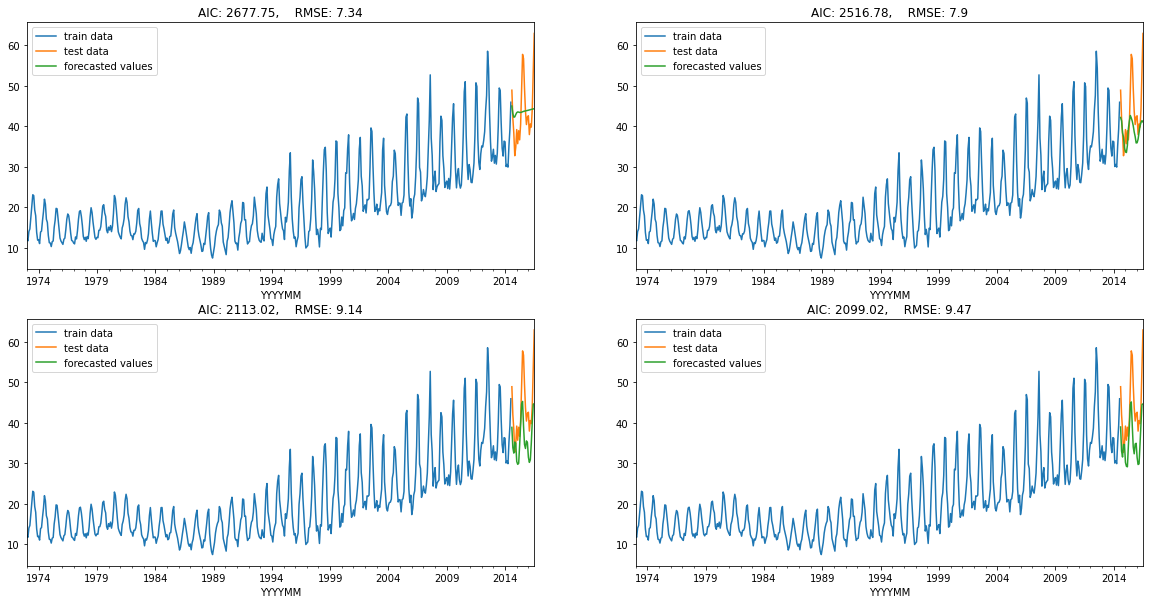

In [71]:
# plotting the forecasted values along with train and test for all the models
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
plot_predicted_output_differencing(ar_3_results, ax1)
plot_predicted_output_differencing(ar_8_results, ax2)
plot_predicted_output_differencing(ar_13_results, ax3)
plot_predicted_output_differencing(ar_16_results, ax4)
plt.show()

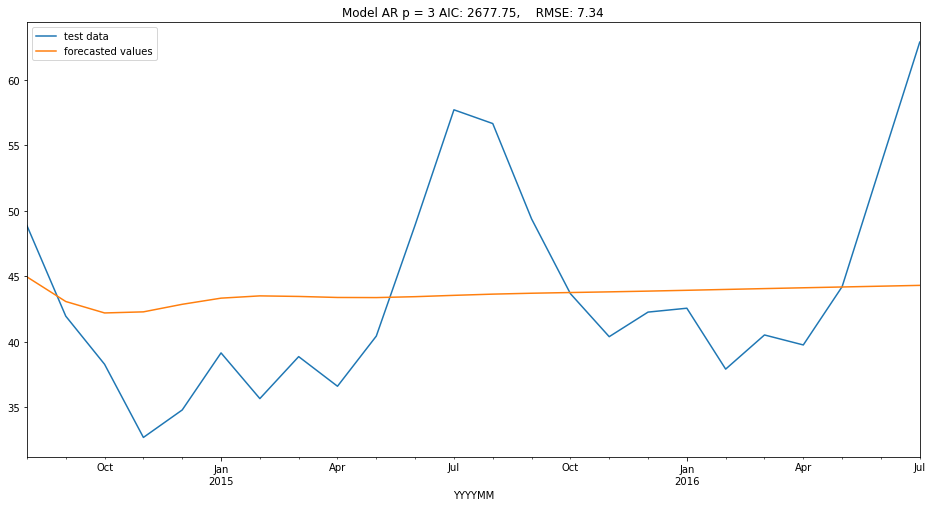

In [72]:
fig, ax = plt.subplots(figsize = (16,8))
predictions = np.cumsum(ar_3_results.predict(start=499, end=522)) + ts_train.iloc[-1]

# setting indices of test data into prediction values
predictions.index = ts_test.index

# computing the AIC and RMSE metrics for the model and printing it into title of the plot
ax.set_title('Model AR p = 3 ' + 'AIC: {}'.format(np.round(ar_3_results.aic, 2)) + 
                       ',    ' +
                       'RMSE: {}'.format(np.round(np.sqrt(mean_squared_error(ts_test, predictions)), 2)))
# plotting the test data
ts_test.plot(ax=ax) 

# plotting the forecasted data
predictions.plot(ax=ax)

# adding the legends sequentially
ax.legend(['test data', 'forecasted values'])

plt.show()

# - **Observations and Insights**
- The AR model with best ballance between AIC and RMSE is the model with parameter p = 3.
- In that model we have AIC = 2677.75 and RMSE = 7.34.

#### MA Modeling

We will check different values of q to find the best pair of AIC and RMSE for the MA model. 

In [73]:
gridsearch_model('MA',24)

Model MA q = 0 AIC = 2787.9 RMSE = 8.05
Model MA q = 1 AIC = 2709.48 RMSE = 8.06
Model MA q = 2 AIC = 2704.8 RMSE = 8.42
Model MA q = 3 AIC = 2647.95 RMSE = 8.06
Model MA q = 4 AIC = 2582.76 RMSE = 9.45
Model MA q = 5 AIC = 2584.43 RMSE = 9.47
Model MA q = 6 AIC = 2585.36 RMSE = 9.58
Model MA q = 7 AIC = 2569.81 RMSE = 8.46
Model MA q = 8 AIC = 2512.81 RMSE = 11.65
Model MA q = 9 AIC = 2579.74 RMSE = 11.86
Model MA q = 10 AIC = 2494.33 RMSE = 9.62
Model MA q = 11 AIC = 2490.2 RMSE = 10.56
Model MA q = 12 AIC = 2426.31 RMSE = 11.05
Model MA q = 13 AIC = 2457.44 RMSE = 12.07
Model MA q = 14 AIC = 2398.35 RMSE = 8.18
Model MA q = 15 AIC = 2382.74 RMSE = 7.49
Model MA q = 16 AIC = 2379.08 RMSE = 7.85
Model MA q = 17 AIC = 2393.55 RMSE = 11.7
Model MA q = 18 AIC = 2366.29 RMSE = 8.83
Model MA q = 19 AIC = 2362.0 RMSE = 9.14
Model MA q = 20 AIC = 2367.09 RMSE = 10.96
Model MA q = 21 AIC = 2368.37 RMSE = 11.35
Model MA q = 22 AIC = 2327.75 RMSE = 8.4
Model MA q = 23 AIC = 2336.69 RMSE = 8.34


In [74]:
# comparing the best pair accordiong to their RMSE and AIC values development
# the percentage indicates relation of the model with the previous, starting with model q=0
pair = ['q=3', 'q=15', 'q=16', 'q=22']
aic = [2787.9, 2647.95, 2382.74, 2379.08, 2327.75 ]
rmse = [8.05, 8.06, 7.49, 7.85, 8.4]
print('RMSE and AIC development from the previous best model.\n')
for i in range(len(aic)-1):
    dif = ((rmse[i+1]/rmse[i])*100)-100
    difa = ((aic[i+1]/aic[i])*100)-100
    print (pair[i]+ ' RMSE development = %.2f' %dif+'%'+' AIC development = %.2f'%difa+'%')

RMSE and AIC development from the previous best model.

q=3 RMSE development = 0.12% AIC development = -5.02%
q=15 RMSE development = -7.07% AIC development = -10.02%
q=16 RMSE development = 4.81% AIC development = -0.15%
q=22 RMSE development = 7.01% AIC development = -2.16%


- Model q = 15 is the best model

In [75]:
#we are using the ARIMA function to build the MA model, so we need to pass the stationary time series that we got after double 
# differencing the original time series. Also, we will keep the p parameter as 0 so that the model acts as MA model

# creating MA model with parameter q = 3
ma_3_model = ARIMA(ts_train_stationary, order=(0, 0, 3))

# creating MA model with parameter q = 15
ma_15_model = ARIMA(ts_train_stationary, order=(0, 0, 15))

# creating MA model with parameter q = 16
ma_16_model = ARIMA(ts_train_stationary, order=(0, 0, 16))

# creating MA model with parameter q = 22
ma_22_model = ARIMA(ts_train_stationary, order=(0, 0, 22))

In [76]:
# fitting all the models that we implemented in above cell
ma_3_results = ma_3_model.fit()
ma_15_results = ma_15_model.fit()
ma_16_results = ma_16_model.fit()
ma_22_results = ma_22_model.fit()

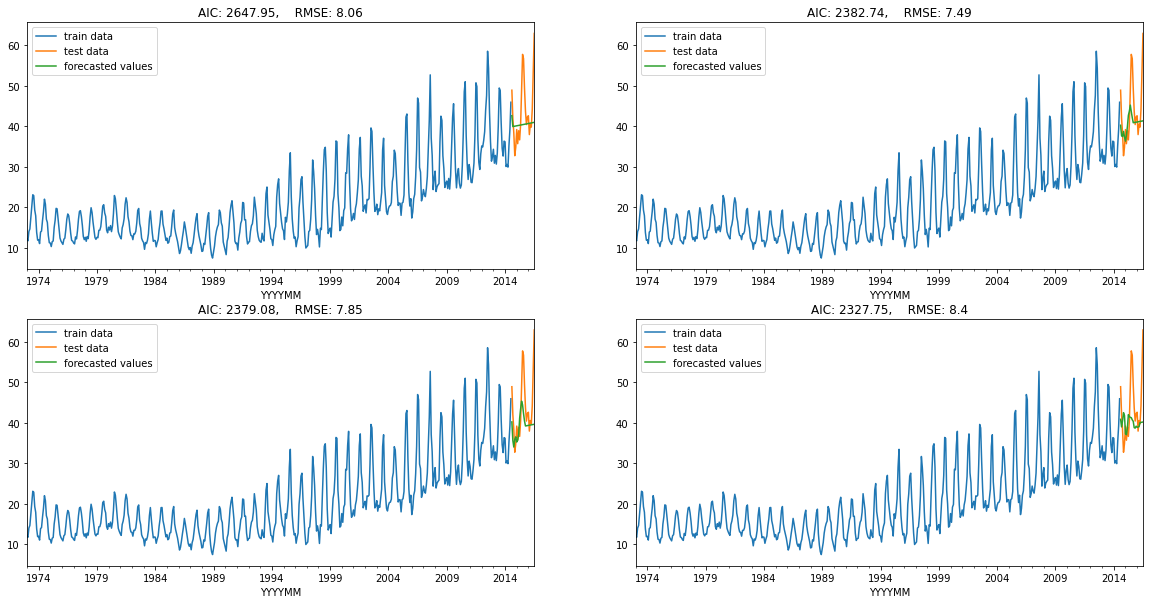

In [77]:
# plotting the forecasted values along with train and test for all the models
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
plot_predicted_output_differencing(ma_3_results, ax1)
plot_predicted_output_differencing(ma_15_results, ax2)
plot_predicted_output_differencing(ma_16_results, ax3)
plot_predicted_output_differencing(ma_22_results, ax4)
plt.show()

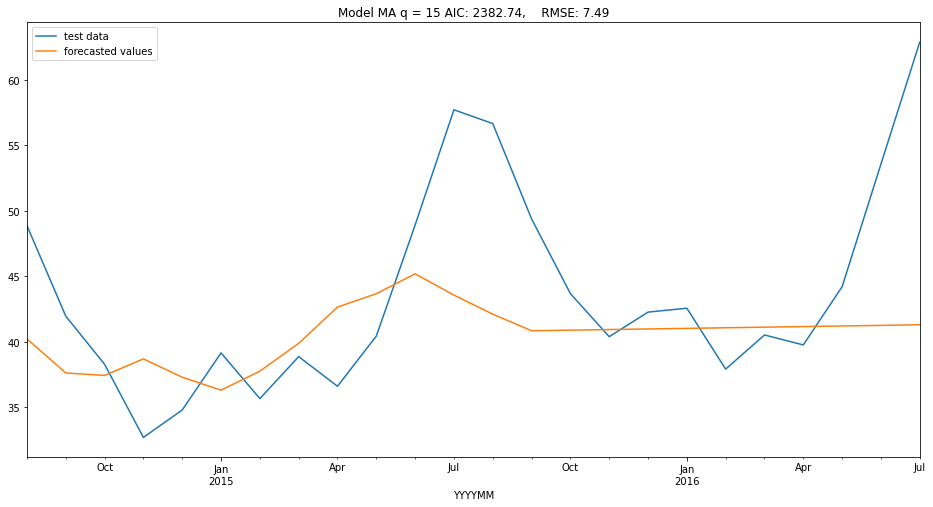

In [78]:
fig, ax = plt.subplots(figsize = (16,8))
predictions = np.cumsum(ma_15_results.predict(start=499, end=522)) + ts_train.iloc[-1]

# setting indices of test data into prediction values
predictions.index = ts_test.index

# computing the AIC and RMSE metrics for the model and printing it into title of the plot
ax.set_title('Model MA q = 15 ' + 'AIC: {}'.format(np.round(ma_15_results.aic, 2)) + 
                       ',    ' +
                       'RMSE: {}'.format(np.round(np.sqrt(mean_squared_error(ts_test, predictions)), 2)))
# plotting the test data
ts_test.plot(ax=ax) 

# plotting the forecasted data
predictions.plot(ax=ax)

# adding the legends sequentially
ax.legend(['test data', 'forecasted values'])

plt.show()

# - **Observations and Insights**
- The MA model with best ballance between AIC and RMSE is the model with parameter p = 11.
- In that model we have AIC = 2118.35 and RMSE = 8.84.
- The model is not capturing the seasonality very well.

#### ARMA Model

We will check some pairs of p and q, to find the best ARMA model.

In [79]:
gridsearch_model('ARMA', 20)

Model ARMA p = 0 q = 0 AIC = 2787.9 RMSE = 8.05
Model ARMA p = 0 q = 1 AIC = 2709.48 RMSE = 8.06
Model ARMA p = 0 q = 2 AIC = 2704.8 RMSE = 8.42
Model ARMA p = 0 q = 3 AIC = 2647.95 RMSE = 8.06
Model ARMA p = 0 q = 4 AIC = 2582.76 RMSE = 9.45
Model ARMA p = 1 q = 0 AIC = 2715.4 RMSE = 8.75
Model ARMA p = 1 q = 1 AIC = 2708.62 RMSE = 8.28
Model ARMA p = 1 q = 2 AIC = 2635.29 RMSE = 9.26
Model ARMA p = 1 q = 3 AIC = 2602.06 RMSE = 8.98
Model ARMA p = 1 q = 4 AIC = 2584.38 RMSE = 9.47
Model ARMA p = 2 q = 0 AIC = 2699.51 RMSE = 7.73
Model ARMA p = 2 q = 1 AIC = 2568.12 RMSE = 9.25
Model ARMA p = 2 q = 2 AIC = 2499.37 RMSE = 7.31
Model ARMA p = 2 q = 3 AIC = 2492.4 RMSE = 7.41
Model ARMA p = 2 q = 4 AIC = 2608.26 RMSE = 12.66
Model ARMA p = 3 q = 0 AIC = 2677.75 RMSE = 7.34
Model ARMA p = 3 q = 1 AIC = 2558.6 RMSE = 9.17
Model ARMA p = 3 q = 2 AIC = 2495.34 RMSE = 7.44
Model ARMA p = 3 q = 3 AIC = 2491.59 RMSE = 7.5
Model ARMA p = 3 q = 4 AIC = 2649.07 RMSE = 8.0
Model ARMA p = 4 q = 0 AIC

In [80]:
# comparing the best pair accordiong to their RMSE and AIC values development
# the percentage indicates relation of the model with the previous, starting with model p=0 q=0 d=0
pair = ['p=0 ,q=3 ','p=2 ,q=2 ', 'p=2 ,q=3 ', 'p=12 ,q=0 ']
aic = [2787.9, 2647.95, 2499.37, 2492.4, 2118.35]
rmse = [8.05, 8.06, 7.31, 7.41, 8.84]
print('RMSE and AIC development from the previous best model.\n')
for i in range(len(aic)-1):
    dif = ((rmse[i+1]/rmse[i])*100)-100
    difa = ((aic[i+1]/aic[i])*100)-100
    print (pair[i]+ ' RMSE development = %.2f' %dif+'%'+' AIC development = %.2f'%difa+'%')

RMSE and AIC development from the previous best model.

p=0 ,q=3  RMSE development = 0.12% AIC development = -5.02%
p=2 ,q=2  RMSE development = -9.31% AIC development = -5.61%
p=2 ,q=3  RMSE development = 1.37% AIC development = -0.28%
p=12 ,q=0  RMSE development = 19.30% AIC development = -15.01%


- Model p = 2 and q = 2 has the best relation AIC and RMSE

In [81]:
# we are using the ARMA function here, so we need to pass stationary time series that we got after double differencing the 
# original time series

# creating an ARMA model with parameter p = 0 and q = 3
ar_0_ma_3_model = ARIMA(ts_train_stationary, order=(0, 0, 3))

# creating an ARMA model with parameter p = 2 and q = 2
ar_2_ma_2_model = ARIMA(ts_train_stationary, order=(2, 0, 2))

# creating an ARMA model with parameter p = 2 and q = 3
ar_2_ma_3_model = ARIMA(ts_train_stationary, order=(2, 0, 3))

# creating an ARMA model with parameter p = 12 and q = 0
ar_12_ma_0_model = ARIMA(ts_train_stationary, order=(12, 0, 0))

In [82]:
# fitting all the models that we implemented in above cell
ar_0_ma_3_results = ar_0_ma_3_model.fit()
ar_2_ma_2_results = ar_2_ma_2_model.fit()
ar_2_ma_3_results = ar_2_ma_3_model.fit()
ar_12_ma_0_results = ar_12_ma_0_model.fit()

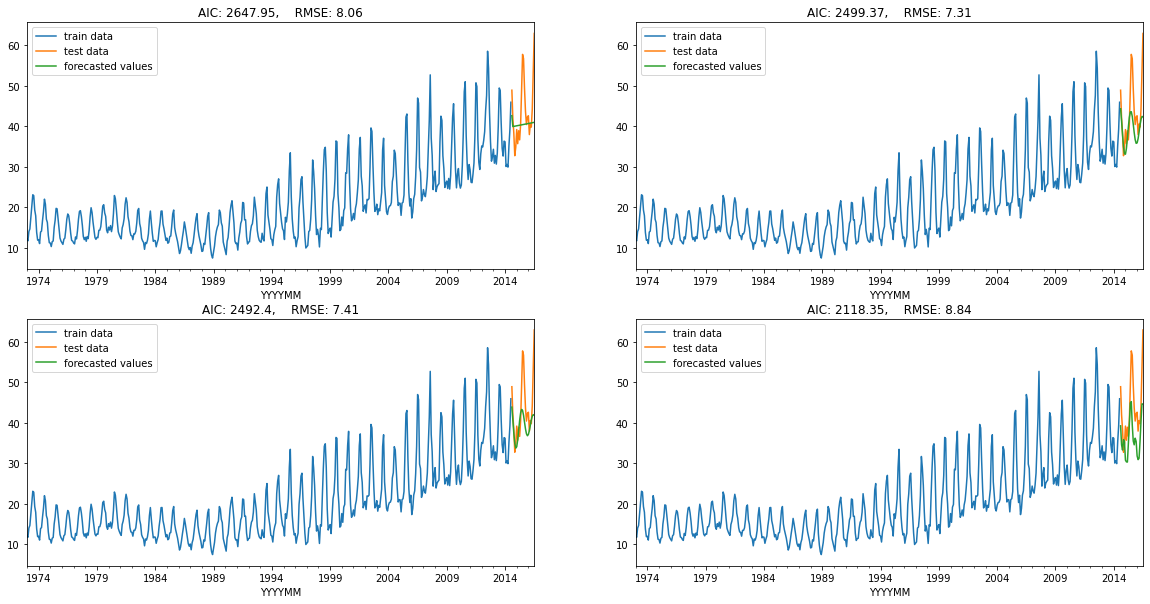

In [83]:
# plotting the forecasted values along with train and test for all the models
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
plot_predicted_output_differencing(ar_0_ma_3_results, ax1)
plot_predicted_output_differencing(ar_2_ma_2_results, ax2)
plot_predicted_output_differencing(ar_2_ma_3_results, ax3)
plot_predicted_output_differencing(ar_12_ma_0_results, ax4)
plt.show()

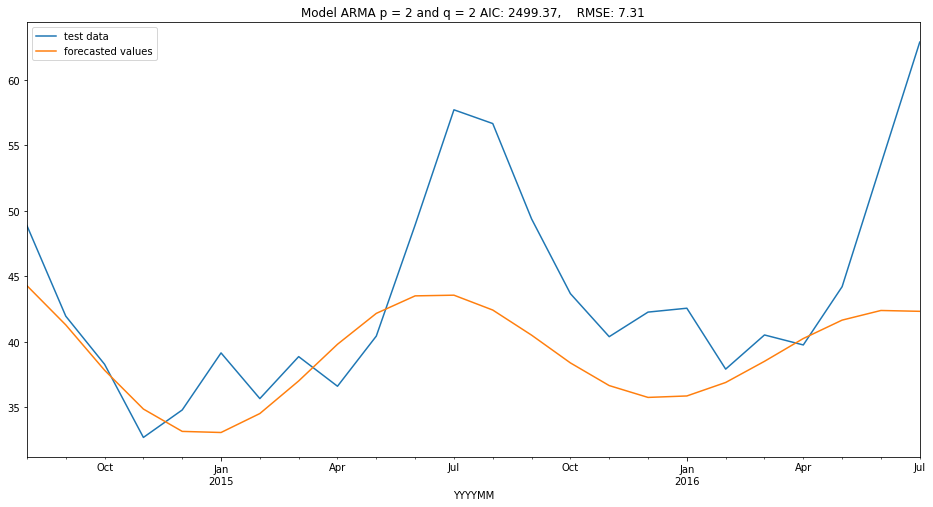

In [84]:
fig, ax = plt.subplots(figsize = (16,8))
predictions = np.cumsum(ar_2_ma_2_results.predict(start=499, end=522)) + ts_train.iloc[-1]

# setting indices of test data into prediction values
predictions.index = ts_test.index

# computing the AIC and RMSE metrics for the model and printing it into title of the plot
ax.set_title('Model ARMA p = 2 and q = 2 ' + 'AIC: {}'.format(np.round(ar_2_ma_2_results.aic, 2)) + 
                       ',    ' +
                       'RMSE: {}'.format(np.round(np.sqrt(mean_squared_error(ts_test, predictions)), 2)))
# plotting the test data
ts_test.plot(ax=ax) 

# plotting the forecasted data
predictions.plot(ax=ax)

# adding the legends sequentially
ax.legend(['test data', 'forecasted values'])

plt.show()

- **Observations and Insights**
- The best ARMA model is the model with parameter p = 2 and q = 2.
- In that model we have AIC = 2499.37 and RMSE = 7.31.

#### ARIMA Model

We will check diferent values of p and q for d = 1

In [85]:
gridsearch_model('ARIMA',20,1)

Model ARIMA p = 0 q = 0 d = 1 AIC = 2781.44 RMSE = 7.94
Model ARIMA p = 0 q = 1 d = 1 AIC = 2698.09 RMSE = 8.89
Model ARIMA p = 0 q = 2 d = 1 AIC = 2688.9 RMSE = 9.44
Model ARIMA p = 0 q = 3 d = 1 AIC = 2633.03 RMSE = 9.68
Model ARIMA p = 0 q = 4 d = 1 AIC = 2563.79 RMSE = 9.66
Model ARIMA p = 1 q = 0 d = 1 AIC = 2708.87 RMSE = 9.8
Model ARIMA p = 1 q = 1 d = 1 AIC = 2697.21 RMSE = 9.28
Model ARIMA p = 1 q = 2 d = 1 AIC = 2625.52 RMSE = 9.84
Model ARIMA p = 1 q = 3 d = 1 AIC = 2587.66 RMSE = 9.83
Model ARIMA p = 1 q = 4 d = 1 AIC = 2565.45 RMSE = 9.68
Model ARIMA p = 2 q = 0 d = 1 AIC = 2688.12 RMSE = 8.4
Model ARIMA p = 2 q = 1 d = 1 AIC = 2563.79 RMSE = 9.54
Model ARIMA p = 2 q = 2 d = 1 AIC = 2485.24 RMSE = 7.49
Model ARIMA p = 2 q = 3 d = 1 AIC = 2500.76 RMSE = 8.91
Model ARIMA p = 2 q = 4 d = 1 AIC = 2567.24 RMSE = 9.7
Model ARIMA p = 3 q = 0 d = 1 AIC = 2661.96 RMSE = 7.53
Model ARIMA p = 3 q = 1 d = 1 AIC = 2549.91 RMSE = 9.44
Model ARIMA p = 3 q = 2 d = 1 AIC = 2554.12 RMSE = 9

In [86]:
# comparing the best pair accordiong to their RMSE and AIC values development
# the percentage indicat relation of the model with the previous, starting with model p=0 q=0 d=1
pair = ['p=4 ,q=4 ,d=1', 'p=16 ,q= 3,d=1', 'p= 16 ,q= 4,d=1', 'p= 19,q= 2,d=1']
rmse = [7.94, 7.17,8.35, 8.31, 8.37]
aic = [2781, 2449.85,2032.09,2034.1, 2000.06]
print('RMSE and AIC development from the previous best model.\n')
for i in range(len(aic)-1):
    dif = ((rmse[i+1]/rmse[i])*100)-100
    difa = ((aic[i+1]/aic[i])*100)-100
    print (pair[i]+ ' RMSE development = %.2f' %dif+'%'+' AIC development = %.2f'%difa+'%')

RMSE and AIC development from the previous best model.

p=4 ,q=4 ,d=1 RMSE development = -9.70% AIC development = -11.91%
p=16 ,q= 3,d=1 RMSE development = 16.46% AIC development = -17.05%
p= 16 ,q= 4,d=1 RMSE development = -0.48% AIC development = 0.10%
p= 19,q= 2,d=1 RMSE development = 0.72% AIC development = -1.67%


**Observation**
- Model p=9 q=2 d=1 has the best trade off between AIC and RMSE

In [147]:
# we are using the ARIMA function here, so we do not need to pass stationary time series, we can simply pass the original time
# without differencing, and pass the parameter d=2, as we already know that after double differencing the original time series
# becomes a stationary time series, that's why in all the below experiments we are passing the parameter d=2

# creating an ARIMA model with parameter p = 4, d = 1 and q = 4
ar_4_d_1_ma_4_model = ARIMA(ts_train, order=(4, 1, 4), enforce_stationarity=False, enforce_invertibility=False)

# creating an ARIMA model with parameter p = 16, d = 1 and q = 3
ar_16_d_1_ma_3_model = ARIMA(ts_train, order=(16, 1, 3), enforce_stationarity=False, enforce_invertibility=False)

# creating an ARIMA model with parameter p = 16, d = 1 and q = 4
ar_16_d_1_ma_4_model = ARIMA(ts_train, order=(16, 1, 4), enforce_stationarity=False, enforce_invertibility=False)

# creating an ARIMA model with parameter p = 19, d = 1 and q = 2
ar_19_d_1_ma_2_model = ARIMA(ts_train, order=(19, 1, 2), enforce_stationarity=False, enforce_invertibility=False)

In [148]:
# fitting all the models that we implemented in above cell
ar_4_d_1_ma_4_results = ar_4_d_1_ma_4_model.fit()
ar_16_d_1_ma_3_results = ar_16_d_1_ma_3_model.fit()
ar_16_d_1_ma_4_results = ar_16_d_1_ma_4_model.fit()
ar_19_d_1_ma_2_results = ar_19_d_1_ma_2_model.fit()

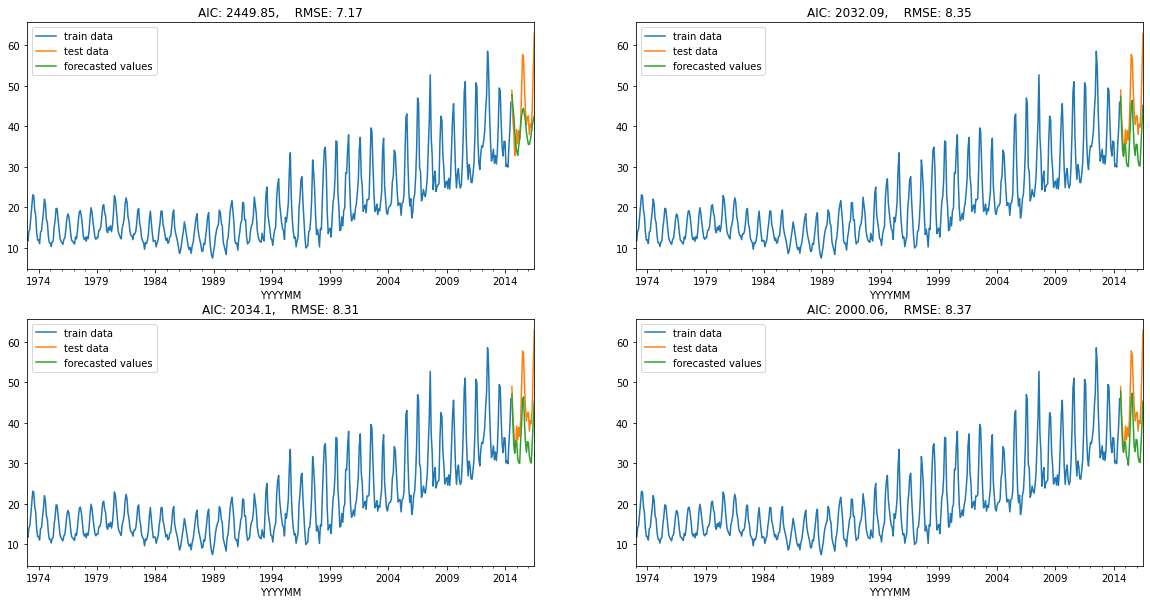

In [149]:
# plotting the forecasted values along with train and test for all the models
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
plot_predicted_output(ar_4_d_1_ma_4_results, ax1)
plot_predicted_output(ar_16_d_1_ma_3_results, ax2)
plot_predicted_output(ar_16_d_1_ma_4_results, ax3)
plot_predicted_output(ar_19_d_1_ma_2_results, ax4)
plt.show()

#### ploting forecast and tes data

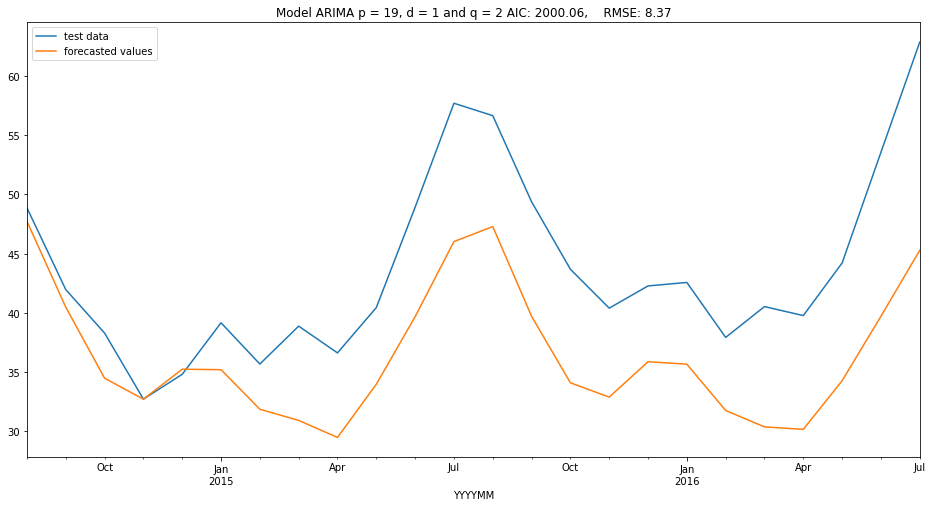

In [154]:
fig, ax = plt.subplots(figsize = (16,8))
predictions = ar_19_d_1_ma_2_results.predict(start=499, end=522)

# setting indices of test data into prediction values
predictions.index = ts_test.index

# computing the AIC and RMSE metrics for the model and printing it into title of the plot
ax.set_title('Model ARIMA p = 19, d = 1 and q = 2 ' + 'AIC: {}'.format(np.round(ar_19_d_1_ma_2_results.aic, 2)) + 
                       ',    ' +
                       'RMSE: {}'.format(np.round(np.sqrt(mean_squared_error(ts_test, predictions)), 2)))
# plotting the test data
ts_test.plot(ax=ax) 

# plotting the forecasted data
predictions.plot(ax=ax)

# adding the legends sequentially
ax.legend(['test data', 'forecasted values'])

plt.show()

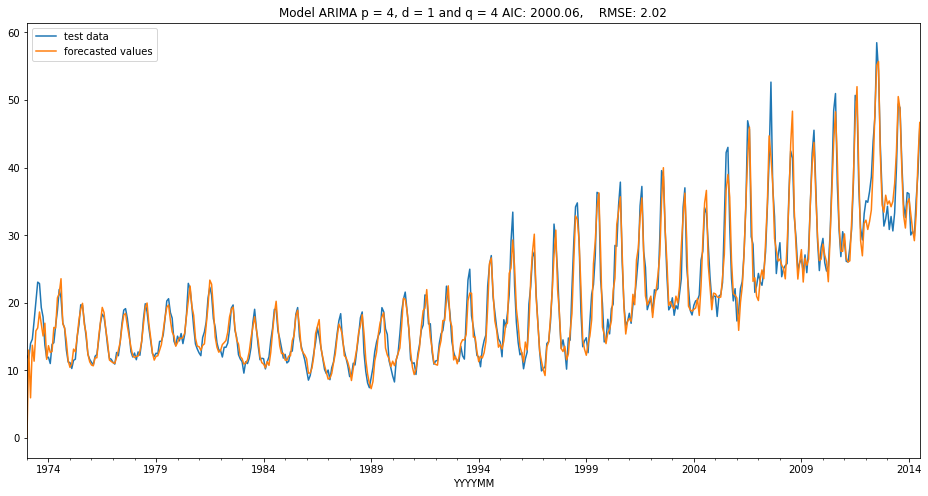

In [155]:
fig, ax = plt.subplots(figsize = (16,8))
predictions = ar_19_d_1_ma_2_results.predict(start=0, end=498)

# setting indices of test data into prediction values
#predictions.index = ts_test.index

# computing the AIC and RMSE metrics for the model and printing it into title of the plot
ax.set_title('Model ARIMA p = 4, d = 1 and q = 4 ' + 'AIC: {}'.format(np.round(ar_19_d_1_ma_2_results.aic, 2)) + 
                       ',    ' +
                       'RMSE: {}'.format(np.round(np.sqrt(mean_squared_error(ts_train, predictions)), 2)))
# plotting the test data
ts_train.plot(ax=ax) 

# plotting the forecasted data
predictions.plot(ax=ax)

# adding the legends sequentially
ax.legend(['test data', 'forecasted values'])

plt.show()

- **Observations and Insights**
- After testing many values of p and q with d = 1, we see that the best model with the best pair of p and q is the ARIMA (p=19, d=1, q=2)
- In that model we have AIC = 2000.06 and RMSE = 8.37.

#### SARIMA model

In [124]:
for p in range(3):
    for q in range(3):
        for P in range(3):
            for Q in range(3):
                model = ARIMA(ts_train, order=(p,1,q), seasonal_order=(P,0,Q,12),enforce_stationarity=False, enforce_invertibility=False)
                model = model.fit()
                predictions = model.predict(start=499, end=522)
                aic = np.round(model.aic, 2)
                rmse = np.round(np.sqrt(mean_squared_error(ts_test, predictions)), 2)
                print('Model SARIMA ('+str(p)+',1,'+str(q)+')('+'('+str(P)+',0,'+str(Q)+')[12] aic= '+str(aic)+' rmse= '+str(rmse))

Model SARIMA (0,1,0)((0,0,0)[12] aic= 2781.44 rmse= 7.94
Model SARIMA (0,1,0)((0,0,1)[12] aic= 2480.15 rmse= 7.11
Model SARIMA (0,1,0)((0,0,2)[12] aic= 2304.01 rmse= 7.35
Model SARIMA (0,1,0)((1,0,0)[12] aic= 2183.04 rmse= 10.27
Model SARIMA (0,1,0)((1,0,1)[12] aic= 2007.65 rmse= 13.55
Model SARIMA (0,1,0)((1,0,2)[12] aic= 1969.83 rmse= 13.61
Model SARIMA (0,1,0)((2,0,0)[12] aic= 2051.13 rmse= 15.6
Model SARIMA (0,1,0)((2,0,1)[12] aic= 1973.04 rmse= 13.61
Model SARIMA (0,1,0)((2,0,2)[12] aic= 1968.71 rmse= 13.58
Model SARIMA (0,1,1)((0,0,0)[12] aic= 2698.09 rmse= 8.89
Model SARIMA (0,1,1)((0,0,1)[12] aic= 2449.74 rmse= 7.43
Model SARIMA (0,1,1)((0,0,2)[12] aic= 2297.54 rmse= 7.14
Model SARIMA (0,1,1)((1,0,0)[12] aic= 2153.54 rmse= 10.3
Model SARIMA (0,1,1)((1,0,1)[12] aic= 1979.32 rmse= 12.18
Model SARIMA (0,1,1)((1,0,2)[12] aic= 1941.12 rmse= 12.18
Model SARIMA (0,1,1)((2,0,0)[12] aic= 2013.46 rmse= 15.04
Model SARIMA (0,1,1)((2,0,1)[12] aic= 1947.76 rmse= 12.18
Model SARIMA (0,1,1)((

In [125]:
for p in range(3):
    for q in range(3):
        for P in range(3):
            for Q in range(3):
                model = ARIMA(ts_log, order=(p,1,q), seasonal_order=(P,0,Q,12),enforce_stationarity=False, enforce_invertibility=False)
                model = model.fit()
                predictions = model.predict(start=499, end=522)
                aic = np.round(model.aic, 2)
                rmse = np.round(np.sqrt(mean_squared_error(ts_test, np.exp(predictions))), 2)
                print('Model SARIMA ('+str(p)+',1,'+str(q)+')('+'('+str(P)+',0,'+str(Q)+')[12] aic= '+str(aic)+' rmse= '+str(rmse))

Model SARIMA (0,1,0)((0,0,0)[12] aic= -389.49 rmse= 7.94
Model SARIMA (0,1,0)((0,0,1)[12] aic= -588.61 rmse= 6.79
Model SARIMA (0,1,0)((0,0,2)[12] aic= -682.18 rmse= 7.61
Model SARIMA (0,1,0)((1,0,0)[12] aic= -846.89 rmse= 9.11
Model SARIMA (0,1,0)((1,0,1)[12] aic= -1008.51 rmse= 11.37
Model SARIMA (0,1,0)((1,0,2)[12] aic= -971.42 rmse= 11.42
Model SARIMA (0,1,0)((2,0,0)[12] aic= -911.85 rmse= 12.5
Model SARIMA (0,1,0)((2,0,1)[12] aic= -974.06 rmse= 11.39
Model SARIMA (0,1,0)((2,0,2)[12] aic= -972.67 rmse= 11.42
Model SARIMA (0,1,1)((0,0,0)[12] aic= -451.68 rmse= 8.79
Model SARIMA (0,1,1)((0,0,1)[12] aic= -612.45 rmse= 7.05
Model SARIMA (0,1,1)((0,0,2)[12] aic= -683.85 rmse= 7.28
Model SARIMA (0,1,1)((1,0,0)[12] aic= -857.33 rmse= 9.47
Model SARIMA (0,1,1)((1,0,1)[12] aic= -1015.79 rmse= 10.85
Model SARIMA (0,1,1)((1,0,2)[12] aic= -979.54 rmse= 10.88
Model SARIMA (0,1,1)((2,0,0)[12] aic= -933.6 rmse= 12.7
Model SARIMA (0,1,1)((2,0,1)[12] aic= -984.21 rmse= 10.87
Model SARIMA (0,1,1)((2

In [156]:
#improvement from the auto_arima model
# checking the improvment with model ARIMA(1.1.2)(2.0.2.12)
aicAA = 2015.49
rmseAA = 5.84

aicS = 1904.84
rmseS = 5.81

print ('Model ARIMA(1.1.2)(2.0.2.12) development in relation to the auto_arima model SARIMA(1,1,1)(1,0,1)[12]')
print ('RMSE development = %.2f' %(((aicS/aicAA)*100)-100)+'%'+' AIC development = %.2f'%(((rmseS/rmseAA)*100)-100)+'%')

Model ARIMA(1.1.2)(2.0.2.12) development in relation to the auto_arima model SARIMA(1,1,1)(1,0,1)[12]
RMSE development = -5.49% AIC development = -0.51%


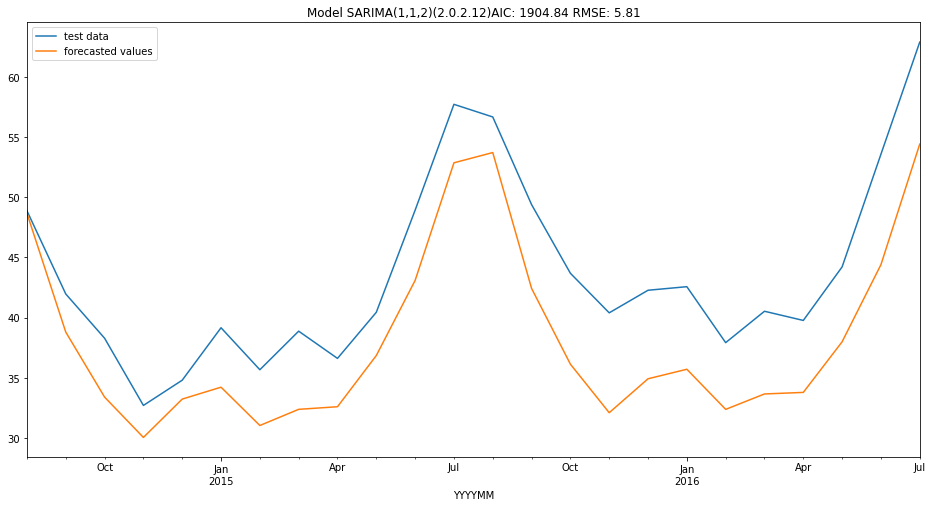

In [172]:
fig, ax = plt.subplots(figsize = (16,8))

model = ARIMA(ts_train, order=(1,1,2), seasonal_order=(2,0,2,12),enforce_stationarity=False, enforce_invertibility=False)
model = model.fit()
predictions = model.predict(start=499, end=522)
aic = np.round(model.aic, 2)
rmse = np.round(np.sqrt(mean_squared_error(ts_test, predictions)), 2)

# setting indices of test data into prediction values
predictions.index = ts_test.index

# computing the AIC and RMSE metrics for the model and printing it into title of the plot
ax.set_title('Model SARIMA(1,1,2)(2.0.2.12)' + 'AIC: %.2f'%aic +' RMSE: %.2f'%rmse)
# plotting the test data
ts_test.plot(ax=ax) 

# plotting the forecasted data
predictions.plot(ax=ax)

# adding the legends sequentially
ax.legend(['test data', 'forecasted values'])

plt.show()

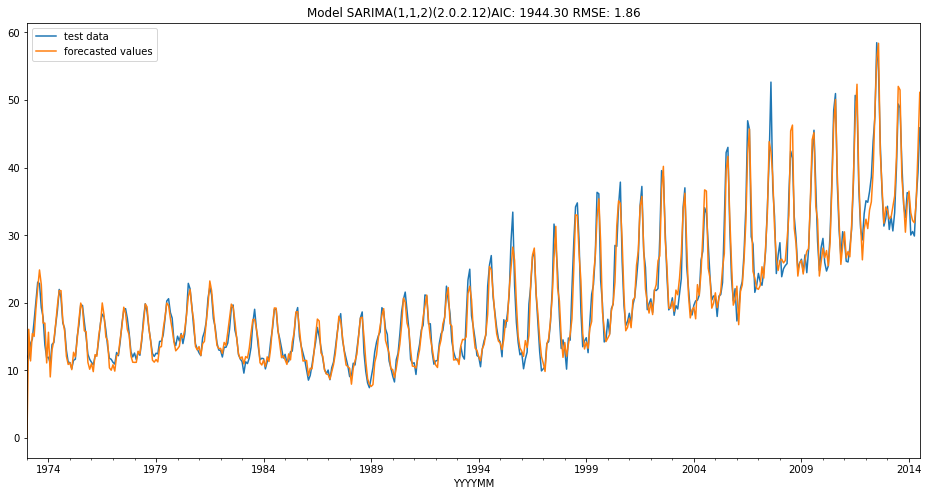

In [173]:
#RMSE train
fig, ax = plt.subplots(figsize = (16,8))

modeltrain = ARIMA(ts_train, order=(1,1,1), seasonal_order=(1,0,1,12),enforce_stationarity=False, enforce_invertibility=False)
modeltrain = modeltrain.fit()
predictionstrain = modeltrain.predict(start=0, end=498)
aic = np.round(modeltrain.aic, 2)
rmse = np.round(np.sqrt(mean_squared_error(ts_train, predictionstrain)), 2)

# setting indices of test data into prediction values
#predictions.index = ts_test.index

# computing the AIC and RMSE metrics for the model and printing it into title of the plot
ax.set_title('Model SARIMA(1,1,2)(2.0.2.12)' + 'AIC: %.2f'%aic +' RMSE: %.2f'%rmse)
# plotting the test data
ts_train.plot(ax=ax) 

# plotting the forecasted data
predictionstrain.plot(ax=ax)

# adding the legends sequentially
ax.legend(['test data', 'forecasted values'])

plt.show()

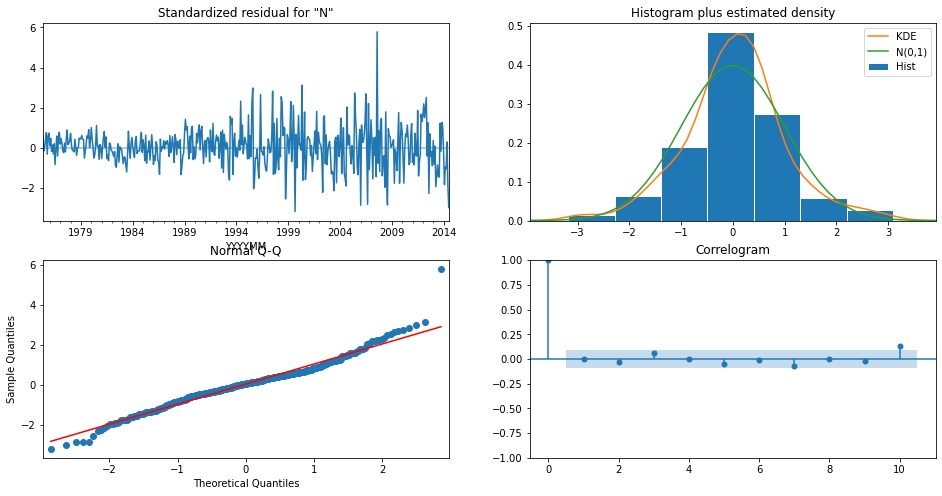

In [174]:
fig = plt.figure(figsize=(16,8))
fig = model.plot_diagnostics(fig=fig)

- **Top left**: The residual errors seem to fluctuate around a mean of zero and have a approximately uniform variance.

- **Top Right**: The density plot suggests that the distribution of residuals is very close to a standard normal distribution.

- **Bottom left**: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution of residuals is skewed.We can observe that the last value is not on the red .line what can indicate a presence of an outlier

- **Bottom Right**: The ACF plot shows the residual errors are not autocorrelated in general. Only lag 0 and 10 are significant. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. That way, probably there is some pattern that the model did not explained.

In [175]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                      Natural Gas   No. Observations:                  499
Model:             ARIMA(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -944.418
Date:                          Sun, 16 Jan 2022   AIC                           1904.836
Time:                                  14:44:03   BIC                           1938.075
Sample:                              01-31-1973   HQIC                          1917.912
                                   - 07-31-2014                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6819      0.063     10.905      0.000       0.559       0.804
ma.L1         -1.0030      0.077    -13.053      0.000      -1.154      -0.852
ma.L2          0.0438      0.064      0.686      0.493      -0.081       0.169
ar.S.L12       0.6268      1.142      0.549      0.583      -1.611       2.864
ar.S.L24       0.3982      1.161      0.343      0.732      -1.877       2.673
ma.S.L12      -0.3734      1.136     -0.329      0.742      -2.599       1.852
ma.S.L24      -0.3264      0.874     -0.373      0.709      -2.040       1.387
sigma2         3.1642      0.145     21.837      0.000       2.880       3.448
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               165.67
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               7.58   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Comparison of techniques and their performances

- We tried and tunned the following techniques:
    
    1 – Auto-Arima, Automatic Autoregressive Integration Moving Average
	
    2 – AR, Autoregressive
	
    3 – MA, Moving Average
	
    4 – ARMA, Autoregressive
	
    5 – ARIMA, Autoregressive Integration Moving Average
	
    6 – SARIMA, Seasonal Autoregressive Integration Moving Average

#### Comparing the performance of the different techniques based on the metric chosen for the problem

The chosen metric was RMSE and AIC. The reason to chose those was to find a precise model (RMSE) with a good balance to prevent overfitting (AIC)

#### Which Technique is performing relatively better?

SARIMA is the technique with best results. We trained the mode usin ARIMA(1,1,2)(2,0,2,12) and obtained AIC =  1904.84 and RMSE = 5.81. those were the lowest values from the trained models.

#### Pros and Cons of different techniques

Technique as Ar, Ma can have a better interpretability than SARIMA and Auto-ARIMA, but do not deal with seasonality.
SARIMA and Auto-Arima deal with seasonality,  and probably that’s the reason for the better performance.

#### Comparison Table

We will show in the following table a comparison of the results from each best model from every 
technique we used.

### Table of Results

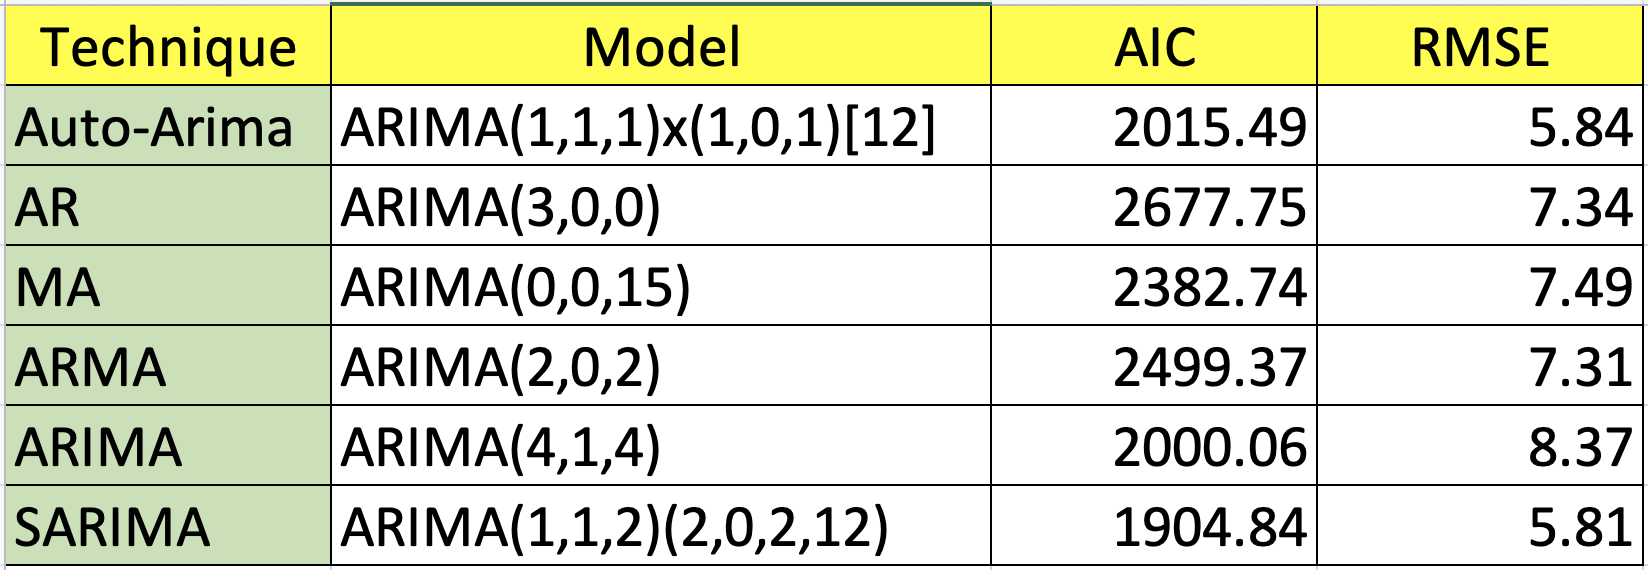

#### Is there scope to improve the performance further?

Yes, there is some scope to improve the results. We could try more parameters for order and seasonality in the SARIMA.

We try to work with an exogenous variable trying a SARIMAX model to capture some possible patter that was not captured.

Trying another kind of technique, like mSSA, could also be an activity trying to improve the performance.
Proposal for the Final Solution Design

### Model to adopt

#### Which is the best model for the problem?

Based on the comparison of all results, the model ARIMA(1,1,2)(2,0,2,12) — SARIMA technique — is the best model to adopt.

The reasons to adopt that model is because it is a model that deals with seasonality, and it had the best results according to the metric we chose.

The model does not have processing performance issues. The results compared to other models that could have a better interpretability is significant better. The chosen model has better 20% for RMSE and 28% for AIC, compared to the AR model, and 22%  for RMSE and 20% for AIC, compared to the MA model. Those better performance by itself justify the adoption of a model with lower interpretability.

### Why is this the best solution to adopt?

#### Reason for choosing the best model

We choose the model ARIMA(1,1,2)2,0,2,12) because it has a significant better result compared to the other models according to the reported above, and it does not have a significant feature that do not indicate it as the adopted model. That way, better RMSE and AIC performance with a relative easy implementation task indicate the chosen model.

#### How that solves the problem?

Our problem was:

According to the given data, understand Natural Gas CO2 emissions in the electric power sector throughout the time, build a model using Time Series techniques to forecast these emissions for the next 12 months, and propose specific measures that can be adopted as policies to reduce those carbon emissions.

Applying our model, we can see and predict for 12 months of Natural Gas CO2 emissions in the electric power sector, according to the following figures.

We had already identified that Natural Gas emissions are increasing as this source is replacing some other sources that emit more CO2 per energy produced. This is a good policy until a clean alternative can be adopted. 

Now we have a good model to predict the mentioned emissions. Therefore, we can see that our problem was solved.



### Final Solution Design

We propose the ARIMA(1,1,2)(2,0,2,12) model for the final solution. This model represents a Seasonal Autoregression Integrated Moving Average (SARIMA), and we decided to choose it because it had the best result according to our metrics AIC and RMSE, and do not have computational permormance issues.

- Design
    - Prepare the Data in a dataframe with the index in the DateTime format YYYYMM.
    - Train the choosen model in the data.
    - Predict the value for the next 12 months.

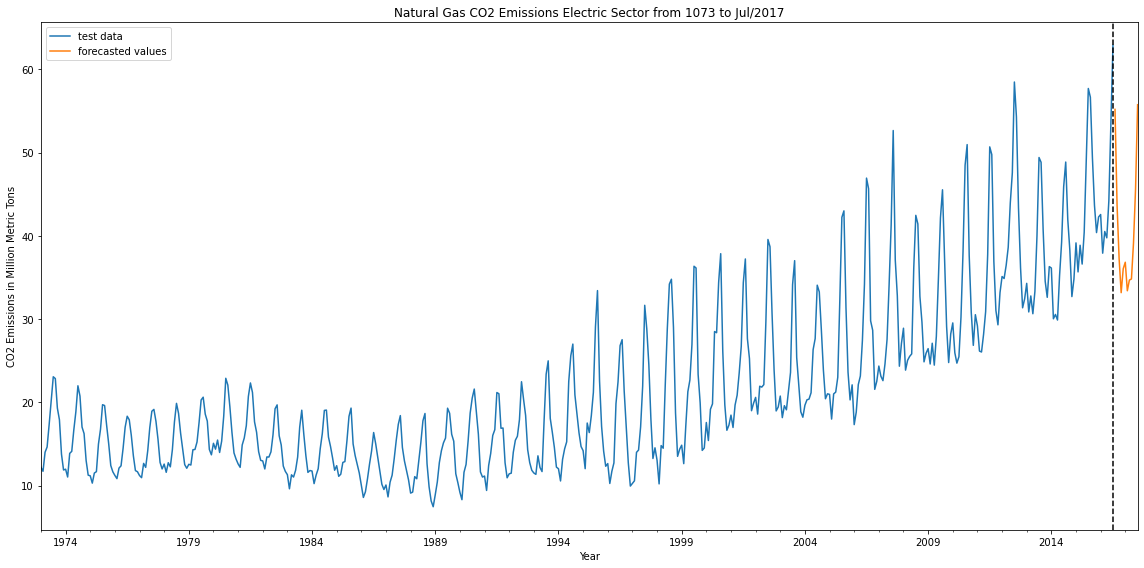

In [176]:
fig, ax = plt.subplots(figsize = (16,8))

predictions = model.predict(start=523, end=534)


ax.set_title('Natural Gas CO2 Emissions Electric Sector from 1073 to Jul/2017')
# plotting the series
tsNaturalGas.plot(ax=ax) 

# plotting the forecasted data
predictions.plot(ax=ax)

# adding the legends sequentially
ax.legend(['test data', 'forecasted values'])
ax.set_ylabel('CO2 Emissions in Million Metric Tons')
ax.set_xlabel('Year')
# showing the time which divides the original data and the forecasted
plt.axvline(x='2016-07-31', color='black', linestyle='--')
fig.tight_layout()
fig.show()
#plt.savefig('naturalgas_emissions_series.png', dpi=300)

### Predict Emissions

In [177]:
#predictions.to_excel('forecasted_values.xlsx')
predictions

2016-08-31    55.199307
2016-09-30    43.698436
2016-10-31    37.265133
2016-11-30    33.172158
2016-12-31    36.048401
2017-01-31    36.830170
2017-02-28    33.401043
2017-03-31    34.687395
2017-04-30    34.820805
2017-05-31    39.126225
2017-06-30    45.607542
2017-07-31    55.762372
Freq: M, Name: predicted_mean, dtype: float64

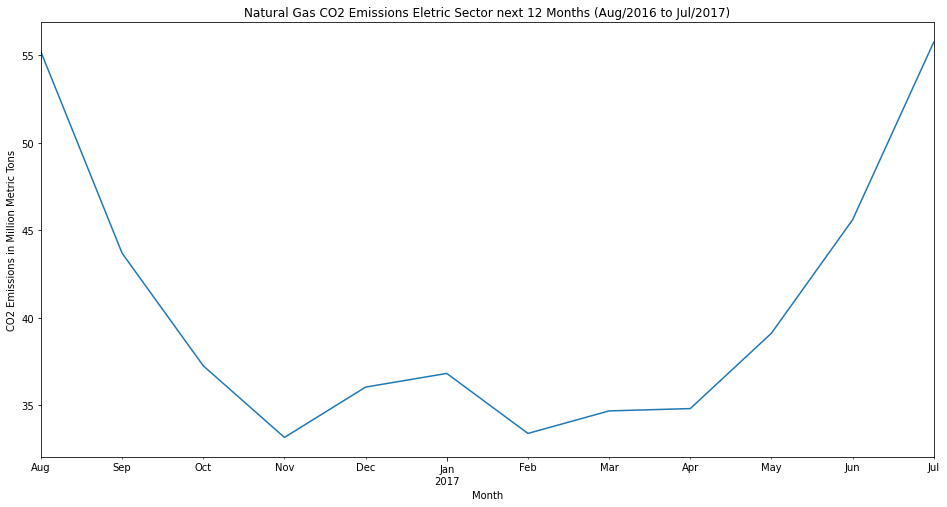

In [178]:

predictions.plot(figsize =(16,8), title = 'Natural Gas CO2 Emissions Eletric Sector next 12 Months (Aug/2016 to Jul/2017)', ylabel = 'CO2 Emissions in Million Metric Tons', xlabel = 'Month')
fig.tight_layout()
fig.show()
#plt.savefig('naturalgas_emissions_naturalgas.png', dpi=300)

## Bibliography

Bryson, Bill. A Short History of Nearly Everything. New York, Broadway Books, 2003.

Nandakumar, Sanjay https://sanjayjsw05.medium.com/time-series-analysis-complete-tutorial-for-beginners-part-3-5c235acf9399, 2020

U.S. Energy Information Administration. Carbon Dioxide Emissions Coefficients. https://www.eia.gov/environment/emissions/co2_vol_mass.php, EIA, 2010

Riebeek, Holli. Global Warming. https://earthobservatory.nasa.gov/features/GlobalWarming, NASA, 2021.


In [315]:
ts_train_95 = ts_train[ts_train.index.year > 1994]

In [319]:
# implementing ADF test on the original time series data
result = adfuller(ts_train_95)

#Printing the results
print('Dickey-Fuller Test')
print('Test statisitic: ',result[0])
print('pvalue: ',result[1])
print('Critical Values: ',result[4])

Dickey-Fuller Test
Test statisitic:  -0.9738982039017787
pvalue:  0.7626649053899758
Critical Values:  {'1%': -3.460567372610299, '5%': -2.874829809033386, '10%': -2.573853225954421}


In [320]:
ts_train_95_diff = ts_train_95.diff().dropna()

In [321]:
# implementing ADF test on the original time series data
result = adfuller(ts_train_95_diff)

#Printing the results
print('Dickey-Fuller Test')
print('Test statisitic: ',result[0])
print('pvalue: ',result[1])
print('Critical Values: ',result[4])

Dickey-Fuller Test
Test statisitic:  -4.888628494365141
pvalue:  3.6696054545253936e-05
Critical Values:  {'1%': -3.460567372610299, '5%': -2.874829809033386, '10%': -2.573853225954421}


In [324]:

#for i in range(1,13):
auto_arima_model_95 = auto_arima(ts_train_95, m=12, d = 1, seasonal=True, trace=True, 
                             error_action='ignore', suppress_warnings=True, randon_state = 1, rmse = True)
auto_arima_model_95.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1448.371, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1193.400, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1322.156, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1446.524, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1417.708, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1106.058, Time=0.23 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1325.425, Time=0.08 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1108.002, Time=0.63 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=1107.991, Time=0.60 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=1276.825, Time=0.19 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=1109.862, Time=1.01 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1113.893, Time=0.17 sec
 ARIMA(2,1,0)(1,0,1)[12] inte

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  235
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -534.434
Date:                            Sun, 16 Jan 2022   AIC                           1078.868
Time:                                    16:48:29   BIC                           1096.145
Sample:                                         0   HQIC                          1085.834
                                            - 235                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6570      0.057     11.447      0.000       0.545       0.769
ma.L1         -0.9780      0.028    -34.669      0.000      -1.033      -0.923
ar.S.L12       0.9974      0.003    383.233      0.000       0.992       1.003
ma.S.L12      -0.8449      0.060    -14.083      0.000      -0.963      -0.727
sigma2         4.8657      0.287     16.964      0.000       4.304       5.428
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                32.54
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                             0.51
Prob(H) (two-sided):                  0.80   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

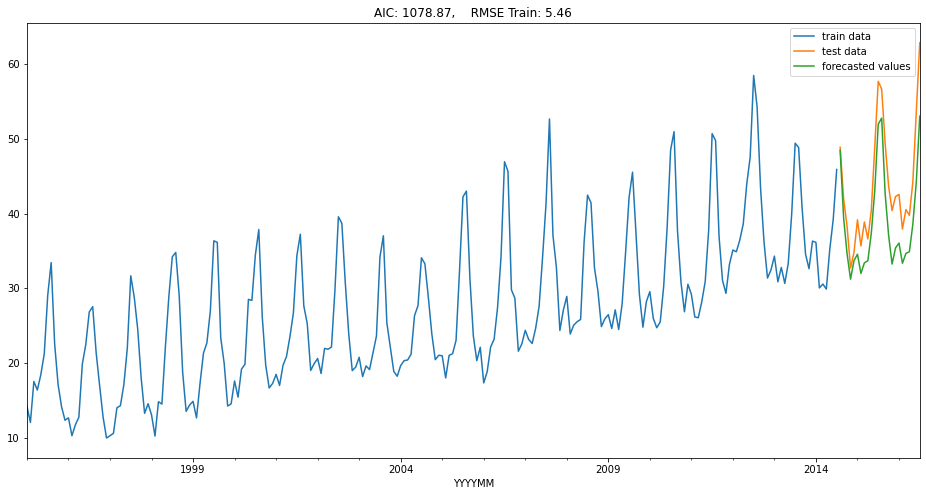

In [328]:
predictions_95, conf_int = auto_arima_model_95.predict(n_periods= 24, return_conf_int=True)
predictions_95 = pd.DataFrame(predictions_95, columns=['Natural Gas'], index = ts_test.index)

fig, ax = plt.subplots(figsize = (16,8))
# setting indices of test data into prediction values
# #predictions.index = ts_test.index

# computing the AIC and RMSE metrics for the model and printing it into title of the plot
ts_train_95.plot(ax=ax, label='train', 
                 title= 'AIC: {}'.format(np.round(auto_arima_model_95.aic(), 2)) + 
                        ',    ' +
                        'RMSE Train: {}'.format(np.round(np.sqrt(mean_squared_error(ts_test, predictions_95)), 2)))
# plotting the test data
ts_test.plot(ax=ax) 

# plotting the forecasted data
predictions_95.plot(ax=ax)

# adding the legends sequentially
ax.legend(['train data', 'test data', 'forecasted values'])

plt.show()

In [337]:
auto_arima_model_95.conf_int()

array([[ 0.54451451,  0.76949714],
       [-1.03331821, -0.9227353 ],
       [ 0.99230158,  1.00250358],
       [-0.96253655, -0.72734369],
       [ 4.30355886,  5.42792131]])

In [232]:
predictions_jan_test

Natural Gas
YYYYMM                 
2015-01-31          NaN
2016-01-31          NaN

#feb

In [204]:
ts_train_feb = ts_train[ts_train.index.month == 2]
ts_test_feb = ts_test[ts_test.index.month == 2]

In [205]:
# implementing ADF test on the first order differenced time series data
result = adfuller(ts_train_feb)


# printing the results
print('Dickey-Fuller Test')
print('Test statisitic: ',result[0])
print('pvalue: ',result[1])
print('Critical Values: ',result[4])

Dickey-Fuller Test
Test statisitic:  1.356683113100156
pvalue:  0.9969081948257497
Critical Values:  {'1%': -3.610399601308181, '5%': -2.939108945868946, '10%': -2.6080629651545038}


In [206]:
ts_train_feb_diff = ts_train_feb.diff().dropna()

In [207]:
# implementing ADF test on the first order differenced time series data
result = adfuller(ts_train_feb_diff)


# printing the results
print('Dickey-Fuller Test')
print('Test statisitic: ',result[0])
print('pvalue: ',result[1])
print('Critical Values: ',result[4])

Dickey-Fuller Test
Test statisitic:  -7.618884485183687
pvalue:  2.154837539281177e-11
Critical Values:  {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625}


In [208]:
auto_arima_model_feb = auto_arima(ts_train_feb, m=1, d = 1, seasonal=True, trace=True, 
                                 error_action='ignore', suppress_warnings=True, randon_state = 1, rmse = True)
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=180.573, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=180.781, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=180.609, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=180.417, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=182.608, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.189 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  499
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1002.745
Date:                            Sun, 16 Jan 2022   AIC                           2015.490
Time:                                    15:10:11   BIC                           2036.543
Sample:                                

In [210]:
predictions_feb = auto_arima_model_feb.predict(3)
predictions_feb

array([30.036, 30.036, 30.036])